In [1]:
# to compare model and human brain
import pandas as pd
import numpy as np

In [2]:

# the date must be working day!
model_trace_log = [
  {
    "date": "2024-05-15",
    "weights": [
      {
        "id": "STAN.L",
        "weight": 0.0988379414494704
      },
      {
        "id": "KO",
        "weight": 0.10885514872237066
      },
      {
        "id": "LLY",
        "weight": 0.16274045692599903
      },
      {
        "id": "GILD",
        "weight": 0.0982685011890021
      },
      {
        "id": "MRK",
        "weight": 0.09608726469000152
      },
      {
        "id": "NOW",
        "weight": 0.10724631420200852
      },
      {
        "id": "VRTX",
        "weight": 0.14695857799430817
      },
      {
        "id": "WMT",
        "weight": 0.18100579482683965
      }
    ]
  },
  {
    "date": "2024-05-16",
    "weights": [
      {
        "id": "CHD",
        "weight": 0.09604227989932394
      },
      {
        "id": "LLY",
        "weight": 0.15701155301162809
      },
      {
        "id": "GILD",
        "weight": 0.08309850279939462
      },
      {
        "id": "MCK",
        "weight": 0.15491295395567367
      },
      {
        "id": "MRK",
        "weight": 0.12300274846059159
      },
      {
        "id": "NOW",
        "weight": 0.0998352785021135
      },
      {
        "id": "VRTX",
        "weight": 0.10564614375465124
      },
      {
        "id": "WMT",
        "weight": 0.18045053961662333
      }
    ]
  },
  {
    "date": "2024-05-22",
    "weights": [
        {
          "id": "KO",
          "weight": 0.10274849558771942
        },
        {
          "id": "LLY",
          "weight": 0.1566002200958428
        },
        {
          "id": "GILD",
          "weight": 0.08707934623088542
        },
        {
          "id": "J",
          "weight": 0.11359767227893916
        },
        {
          "id": "MRK",
          "weight": 0.10567158852690067
        },
        {
          "id": "NOW",
          "weight": 0.11206722758523373
        },
        {
          "id": "VRTX",
          "weight": 0.142924247158989
        },
        {
          "id": "WMT",
          "weight": 0.17931120253548977
        }
      ]
  },
  {
    "date": "2024-06-10",
    "weights": [
        {
            "id": "STAN.L",
            "weight": 0.099809488530
        },
        {
            "id": "LLY",
            "weight": 0.141107090394177
        },
        {
            "id": "GILD",
            "weight": 0.14317362063347
        },
        {
            "id": "JKHY",
            "weight": 0.13209880165885
        },
        {
            "id": "MCK",
            "weight": 0.098208917045372
        },
        {
            "id": "NVR",
            "weight": 0.177313820149842
        },
        {
            "id": "NOW",
            "weight": 0.087160539294239
        },
        {
            "id": "VRTX",
            "weight": 0.12112772229333
        }
    ]
  },
  {
    "date": "2024-08-08",
    "weights": [
    {
        "id": "STAN.L",
        "weight": 0.06940932033704353
    },
    {
        "id": "AMGN",
        "weight": 0.07431243214457392
    },
    {
        "id": "BIIB",
        "weight": 0.042900139778976665
    },
    {
        "id": "COST",
        "weight": 0.03558101407191769
    },
    {
        "id": "CTRA",
        "weight": 0.05635014005671591
    },
    {
        "id": "LLY",
        "weight": 0.03948522028075085
    },
    {
        "id": "GILD",
        "weight": 0.1454264331821711
    },
    {
        "id": "HOLX",
        "weight": 0.05758084586182881
    },
    {
        "id": "JBL",
        "weight": 0.005493340409292151
    },
    {
        "id": "JKHY",
        "weight": 0.1526600094065125
    },
    {
        "id": "MCK",
        "weight": 0.07232195285376533
    },
    {
        "id": "NVR",
        "weight": 0.06949839934412294
    },
    {
        "id": "PGR",
        "weight": 0.04417625540632342
    },
    {
        "id": "NOW",
        "weight": 0.05764335559940242
    },
    {
        "id": "STE",
        "weight": 0.0076256697455101465
    },
    {
        "id": "SMCI",
        "weight": 0.042851698736872286
    },
    {
        "id": "TTWO",
        "weight": 0.010628803276210979
    },
    {
        "id": "VRTX",
        "weight": 0.01605496950800943
    }
  ]
  },
  {
    "date": "2024-08-19",
    "weights":  [
      {
          "id": "STAN.L",
          "weight": 0.02090530701681672
      },
      {
          "id": "CTRA",
          "weight": 0.039525249097928664
      },
      {
          "id": "LLY",
          "weight": 0.07781991214048126
      },
      {
          "id": "GILD",
          "weight": 0.103091631334796
      },
      {
          "id": "JKHY",
          "weight": 0.19322764738301704
      },
      {
          "id": "NVR",
          "weight": 0.19999999999999962
      },
      {
          "id": "SMCI",
          "weight": 0.06095072592843817
      },
      {
          "id": "UNH",
          "weight": 0.0997655409399469
      },
      {
          "id": "VRTX",
          "weight": 0.02215266539408572
      },
      {
          "id": "WMT",
          "weight": 0.07527618703969421
      },
      {
          "id": "600276.SS",
          "weight": 0.02574741655617227
      },
      {
          "id": "601225.SS",
          "weight": 0.08108564359822486
      }
  ]
  },
  {
      "date": "2024-08-27",
      "weights":   [
        {
            "id": "RHM.DE",
            "weight": 0.011395852207041484
        },
        {
            "id": "FRAS.L",
            "weight": 0.09640906381745395
        },
        {
            "id": "CTRA",
            "weight": 0.03023819619758223
        },
        {
            "id": "LLY",
            "weight": 0.058479654890121
        },
        {
            "id": "GILD",
            "weight": 0.16904811360896962
        },
        {
            "id": "JKHY",
            "weight": 0.2
        },
        {
            "id": "PGR",
            "weight": 0.06012139904756649
        },
        {
            "id": "SMCI",
            "weight": 0.07466780405733559
        },
        {
            "id": "VRTX",
            "weight": 0.026939136514627482
        },
        {
            "id": "WMT",
            "weight": 0.09133278380032214
        },
        {
            "id": "600150.SS",
            "weight": 0.018772858604274755
        },
        {
            "id": "600519.SS",
            "weight": 0.12040575367173317
        },
        {
            "id": "600900.SS",
            "weight": 0.0014987798535868154
        },
        {
            "id": "601225.SS",
            "weight": 0.04069060372937267
        }
    ]}
]


In [3]:
# Extract unique stock ids and determine the overall period for analysis


In [4]:
import os
import json

def load_data(trace_log_dir, trace_log):
  folder = trace_log_dir
  # the list of the json files
  files = os.listdir(folder)
  # sort the files
  files.sort()

  for file in files:
      # get the date from the file name
      date = file.split('.')[0].split('_')[-1]
      # convert the date from YYYYMMDD to YYYY-MM-DD
      date = '-'.join([date[:4], date[4:6], date[6:]])
      #print('loading data for', date)
      # read the json
      with open(os.path.join(folder, file)) as f:
          data = json.load(f)

      if '_' in data[0]["id"]:
            # Dictionary to store combined weights
            combined_weights = {}
            for stock in data:
                stock_id = stock["id"].split('_')[0]
                weight = stock["weight"]
                if stock_id in combined_weights:
                    combined_weights[stock_id] += weight
                else:
                    combined_weights[stock_id] = weight
            # Convert the dictionary back to a list of dictionaries
            data = [{"id": stock_id, "weight": weight} for stock_id, weight in combined_weights.items()]


      # extract the weights
      trace_log.append(
          {
              "date": date,
              "weights": data
          }
      )
  return trace_log


In [5]:
# enumerate the folder: processed_data_128/computed_portfolios, read the json files
# and extract the weights
import os
import json
# the folder containing the computed portfolios
folder = 'processed_data_128/computed_portfolios'
# the list of the json files
model_trace_log = load_data(folder, model_trace_log)
#model_trace_log


In [6]:
model_multi_horizon_trace_log = []
model_multi_horizon_trace_log = load_data('multi_horizon', model_multi_horizon_trace_log)
#print('model_multi_horizon_trace_log:')
#model_multi_horizon_trace_log

In [7]:
model_short_log = []
model_short_log = load_data('processed_data_128/computed_portfolios_short', model_short_log)

In [8]:
model_short_v2_log = []
model_short_v2_log = load_data('multi_horizon_short', model_short_v2_log)

model_shorter_short_v2_log = []
model_shorter_short_v2_log = load_data('multi_shorter_horizon_short', model_shorter_short_v2_log)

In [9]:
model_v2025_log = []
model_v2025_log = load_data('multi_horizon_v2025', model_v2025_log)

model_short_v2025_log = []
model_short_v2025_log = load_data('multi_horizon_v2025_short', model_short_v2025_log)

In [10]:
human_trace_log = []
human_trace_log = load_data('human', human_trace_log)

In [11]:
unique_ids = set()
for log in model_trace_log:
    for asset in log['weights']:
        # remove the minus sign before the stock id
        if asset['id'][0] == '-':
            asset['id'] = asset['id'][1:]
        unique_ids.add(asset['id'])

for log in human_trace_log:
    for asset in log['weights']:
        if asset['id'][0] == '-':
            asset['id'] = asset['id'][1:]
        unique_ids.add(asset['id'])

for log in model_multi_horizon_trace_log:
    for asset in log['weights']:
        if asset['id'][0] == '-':
            asset['id'] = asset['id'][1:]
        unique_ids.add(asset['id'])

for log in model_short_log:
    for asset in log['weights']:
        unique_ids.add(asset['id'])

for log in model_short_v2_log:
    for asset in log['weights']:
        unique_ids.add(asset['id'])
        

for log in model_v2025_log:
    for asset in log['weights']:
        unique_ids.add(asset['id'])
        
for log in model_short_v2025_log:
    for asset in log['weights']:
        unique_ids.add(asset['id'])



In [12]:
len(unique_ids)

385

In [13]:
unique_ids.add('^GSPC')

In [14]:
from pandas_datareader import data as pdr
import yfinance as yfin



#stocks_data = yfin.download(list(unique_ids), start='2024-05-14', end=None)['Close']
stocks_data = yfin.download(unique_ids, start='2024-05-14', auto_adjust=False, end=None)['Adj Close']


[*********************100%***********************]  386 of 386 completed

5 Failed downloads:
['JNPR', 'DFS', 'PARA', 'HES']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-14 -> 2025-10-11) (Yahoo error = "No data found, symbol may be delisted")')
['NFLX']: Timeout('Failed to perform, curl: (28) Operation timed out after 10000 milliseconds with 932 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


In [15]:
stocks_data

Ticker,600028.SS,600030.SS,600031.SS,600089.SS,600111.SS,600150.SS,600276.SS,600406.SS,600436.SS,600438.SS,...,WMB,WMT,WPP.L,WRB,WST,WYNN,XLE,XLV,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-14,5.799259,18.230637,16.362364,14.339763,20.049387,38.070057,44.944447,22.890612,235.410294,21.625671,...,38.141804,59.113480,845.653015,50.816208,353.149841,96.469238,89.224243,140.455719,166.444321,5246.680176
2024-05-15,5.762843,17.981297,16.236719,14.156290,19.691362,36.461601,44.290058,22.321899,230.446121,21.328642,...,38.245750,59.083851,844.454346,50.519680,350.200897,96.055969,89.424217,142.542175,170.790985,5308.149902
2024-05-16,5.735531,18.010067,16.449345,14.050071,19.641638,35.869530,44.309887,21.810061,229.728668,21.319059,...,38.699375,63.211723,854.043579,50.661495,352.781219,95.554138,89.176636,142.376419,171.214813,5297.100098
2024-05-17,5.771947,18.403257,16.478338,14.117665,19.880320,35.336670,44.369377,21.876408,229.883789,20.983704,...,39.001785,63.843735,847.051392,51.125629,354.305481,95.485085,90.424057,142.649414,171.559799,5303.270020
2024-05-20,5.835675,18.499157,16.343033,14.156290,20.278126,35.830063,43.437378,21.611012,230.387939,20.926214,...,39.162441,63.379597,846.452087,50.713066,341.473785,96.343353,89.833672,142.347168,171.885040,5308.129883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.580002,102.699997,370.724335,76.980003,268.070007,124.589996,89.349998,144.119995,145.360001,6740.279785
2025-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.970001,103.239998,366.425232,77.769997,265.970001,122.910004,89.489998,144.229996,142.770004,6714.589844
2025-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.500000,102.900002,367.524994,77.839996,267.929993,121.570000,88.970001,144.509995,143.490005,6753.720215


In [16]:
stocks_data.index

DatetimeIndex(['2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
               '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23',
               '2024-05-24', '2024-05-27',
               ...
               '2025-09-29', '2025-09-30', '2025-10-01', '2025-10-02',
               '2025-10-03', '2025-10-06', '2025-10-07', '2025-10-08',
               '2025-10-09', '2025-10-10'],
              dtype='datetime64[ns]', name='Date', length=368, freq=None)

In [17]:
#stocks_data.loc['2025-04-25', 'OCDO.L'] = stocks_data.loc['2025-04-28', 'OCDO.L']
#stocks_data.loc['2025-04-26', 'OCDO.L'] = stocks_data.loc['2025-04-28', 'OCDO.L']
#stocks_data.loc['2025-04-27', 'OCDO.L'] = stocks_data.loc['2025-04-28', 'OCDO.L']

In [18]:
# convert to USD
from util import convert, get_currency_pair


for stock_name in list(unique_ids):
  stock_suffix = '.' + stock_name.split('.')[-1]

  exchange_name, needs_inversion, exchange_name_yahoo = get_currency_pair(stock_suffix, 'USD')
  # print(stock_suffix)
  # print(exchange_name)
  if exchange_name is not None:
    print(f'Converting {stock_name} to USD')
    df = stocks_data[[stock_name]]
    if len(df) == 0:
      print(f'No data for {stock_name}')
      continue
    df = df.rename(columns={stock_name: 'Adj Close'})
    df['Volume'] = 0
    df = df.sort_index(ascending=True)
    df = convert(df, exchange_name, needs_inversion, exchange_name_yahoo)
    stocks_data[stock_name] = df['Adj Close']



Converting FRES.L to USD
Converting 601088.SS to USD
Converting BNR.DE to USD
Converting STAN.L to USD
Converting 600030.SS to USD
Converting BARC.L to USD
Converting 600900.SS to USD
Converting OCDO.L to USD
Converting BRBY.L to USD
Converting PRU.L to USD
Converting IMB.L to USD
Converting SWED-A.ST to USD
Converting KINV-B.ST to USD
Converting LLOY.L to USD
Converting ADM.L to USD
Converting SRT3.DE to USD
Converting III.L to USD
Converting BAYN.DE to USD
Converting 600089.SS to USD
Converting BA.L to USD
Converting IAG.L to USD
Converting SSE.L to USD
Converting 601225.SS to USD
Converting IFX.DE to USD
Converting UTG.L to USD
Converting ANTO.L to USD
Converting SY1.DE to USD
Converting ADS.DE to USD
Converting FRAS.L to USD
Converting KGF.L to USD
Converting FLTR.L to USD
Converting FCIT.L to USD
Converting ALV.DE to USD
Converting HWDN.L to USD
Converting MRO.L to USD
Converting DGE.L to USD
Converting 601669.SS to USD
Converting DHL.DE to USD
Converting 600406.SS to USD
Converti

In [19]:
duplicates = stocks_data.index.duplicated()
print(stocks_data.index[duplicates])

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [20]:
import pandas as pd
# Assuming stocks_data is already defined and imported
# Create a range of dates from the minimum to the maximum date in the original DataFrame
stocks_data = stocks_data.sort_index()
all_dates = pd.date_range(start=stocks_data.index.min(), end=stocks_data.index.max(), freq='D')


stocks_data = stocks_data.reindex(all_dates, method='ffill')
#stocks_data

In [21]:
stocks_data.index

DatetimeIndex(['2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
               '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21',
               '2024-05-22', '2024-05-23',
               ...
               '2025-10-01', '2025-10-02', '2025-10-03', '2025-10-04',
               '2025-10-05', '2025-10-06', '2025-10-07', '2025-10-08',
               '2025-10-09', '2025-10-10'],
              dtype='datetime64[ns]', length=515, freq='D')

In [22]:
stocks_data.fillna(method='ffill', inplace=True)
sp500_data = stocks_data['^GSPC']
sp500_data

/tmp/ipykernel_3867603/685706444.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data.fillna(method='ffill', inplace=True)


2024-05-14    5246.680176
2024-05-15    5308.149902
2024-05-16    5297.100098
2024-05-17    5303.270020
2024-05-18    5303.270020
                 ...     
2025-10-06    6740.279785
2025-10-07    6714.589844
2025-10-08    6753.720215
2025-10-09    6735.109863
2025-10-10    6552.509766
Freq: D, Name: ^GSPC, Length: 515, dtype: float64

In [23]:
# remove ^GSPC from stocks_data
stocks_data.drop(columns=['^GSPC'], inplace=True)

# remove ^GSPC from unique_ids
unique_ids.remove('^GSPC')

In [24]:
import numpy as np

sp500_log_return = pd.DataFrame(np.log(sp500_data)).diff()[1:]

In [25]:
import numpy as np
log_return = pd.DataFrame(np.log(stocks_data)).diff()[1:]

In [26]:
log_return = log_return.fillna(0)

In [27]:
log_return

Ticker,600028.SS,600030.SS,600031.SS,600089.SS,600111.SS,600150.SS,600276.SS,600406.SS,600436.SS,600438.SS,...,WM,WMB,WMT,WPP.L,WRB,WST,WYNN,XLE,XLV,ZTS
2024-05-15,-0.004293,-0.011765,-0.005702,-0.010871,-0.016012,-0.041162,-0.012660,-0.023152,-0.019306,-0.011824,...,-0.004106,0.002722,-0.000501,0.004127,-0.005852,-0.008385,-0.004293,0.002239,0.014746,0.025780
2024-05-16,-0.004626,0.001723,0.013135,-0.007407,-0.002404,-0.016247,0.000572,-0.023072,-0.002993,-0.000325,...,0.015195,0.011791,0.067532,0.013186,0.002803,0.007341,-0.005238,-0.002772,-0.001164,0.002478
2024-05-17,0.005609,0.020877,0.001041,0.004079,0.011358,-0.015687,0.000622,0.002317,-0.000045,-0.016576,...,-0.008329,0.007784,0.009949,-0.006566,0.009120,0.004311,-0.000723,0.013891,0.001916,0.002013
2024-05-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-05-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.009464,-0.014056,0.006153,-0.000265,0.001560,-0.016611,0.007492,0.004937,-0.004845,-0.007266
2025-10-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000597,0.006115,0.005244,-0.007869,0.010210,-0.007865,-0.013576,0.001566,0.000763,-0.017978
2025-10-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011062,-0.007374,-0.003299,-0.001752,0.000900,0.007342,-0.010962,-0.005828,0.001939,0.005030
2025-10-09,0.013216,-0.008326,0.000070,0.095380,0.095380,0.012707,-0.005536,0.018198,-0.002881,0.018297,...,-0.011200,-0.006319,-0.011042,-0.062103,-0.004119,-0.016369,0.016156,-0.013693,-0.002217,-0.000697


In [28]:
start_date = pd.to_datetime(model_trace_log[0]['date'])

In [29]:
def update_weight(weights_attr, unique_ids):
  weights = np.zeros(len(unique_ids))
  for asset in weights_attr:
    asset_id = asset['id']
    asset_weight = asset['weight']
    if 'operation' in asset:
      direction = asset['operation']
      if direction == 'short' and asset_weight > 0:
        asset_weight = -asset_weight
    asset_index = sorted(unique_ids).index(asset_id)
    weights[asset_index] = asset_weight
  return weights

In [30]:
# enumerate the dates from start_date to now in the log_return's index

cur_asset_model = 1
cur_asset_model_hist = [1]
model_contrib_hist = {stock: [] for stock in log_return.columns}
model_weights = np.zeros(len(unique_ids))

cur_asset_model_v2 = 1
cur_asset_model_v2_hist = [1]
model_v2_contrib_hist = {stock: [] for stock in log_return.columns}
model_v2_weights = np.zeros(len(unique_ids))

cur_asset_model_short = 1
cur_asset_model_short_hist = [1]
model_short_contrib_hist = {stock: [] for stock in log_return.columns}
model_short_weights = np.zeros(len(unique_ids))

cur_asset_model_short_v2 = 1
cur_asset_model_short_v2_hist = [1]
model_short_v2_contrib_hist = {stock: [] for stock in log_return.columns}
model_short_v2_weights = np.zeros(len(unique_ids))

cur_asset_model_v2025 = 1
cur_asset_model_v2025_hist = [1]
model_v2025_contrib_hist = {stock: [] for stock in log_return.columns}

cur_asset_model_short_v2025 = 1
cur_asset_model_short_v2025_hist = [1]
model_short_v2025_contrib_hist = {stock: [] for stock in log_return.columns}

cur_asset_human = 1
cur_asset_human_hist = [1]
human_contrib_hist = {stock: [] for stock in log_return.columns}
human_weights = np.zeros(len(unique_ids))


cur_asset_sp500 = 1
cur_asset_sp500_hist = [1]
sp500_contrib_hist = {stock: [] for stock in log_return.columns}




for date in log_return.index:
  # get the date as a string
  date_str = str(date.date())
  # enumerate the trade log to see if the date is in the model_trace_log
  for log in model_trace_log:
    if log['date'] == date_str:
      model_weights = update_weight(log['weights'], unique_ids)

  for log in human_trace_log:
    if log['date'] == date_str:
      human_weights = update_weight(log['weights'], unique_ids)

  # daily profit for multi-horizon model are same before 2024-10-10 as the old model
  if date < pd.Timestamp('2024-10-10'):
    model_v2_weights = model_weights
  else:
    for log in model_multi_horizon_trace_log:
      if log['date'] == date_str:
        print(f'update model_v2_weights for {date_str}')
        model_v2_weights = update_weight(log['weights'], unique_ids)


  if date < pd.Timestamp('2024-11-29'):
    model_short_weights = model_weights
  else:
    for log in model_short_log:
      if log['date'] == date_str:
        print(f'update model_short_weights for {date_str}')
        model_short_weights = update_weight(log['weights'], unique_ids)

  if date < pd.Timestamp('2024-11-29'):
    model_short_v2_weights = model_v2_weights
  else:
    for log in model_short_v2_log:
      if log['date'] == date_str:
        print(f'update model_short_weights for {date_str}')
        model_short_v2_weights = update_weight(log['weights'], unique_ids)
        
  if date < pd.Timestamp('2025-10-05'):
    model_v2025_weights = model_v2_weights
  else:
    for log in model_v2025_log:
      if log['date'] == model_v2025_log:
        print(f'update model_v2025_weights for {date_str}')
        model_v2025_weights = update_weight(log['weights'], unique_ids)
        
  if date < pd.Timestamp('2025-10-05'):
    model_short_v2025_weights = model_short_v2_weights
  else:
    for log in model_short_v2025_log:
      if log['date'] == model_short_v2025_log:
        print(f'update model_short_v2025_weights for {date_str}')
        model_short_v2025_weights = update_weight(log['weights'], unique_ids)
  

  daily_log_return_values = log_return.loc[date].values

  # get the daily profit
  daily_log_return_model = np.dot(model_weights, daily_log_return_values)
  daily_model_contributions = model_weights * daily_log_return_values
  for stock, contrib in zip(log_return.columns, daily_model_contributions):
      model_contrib_hist[stock].append(contrib)

  cur_asset_model = cur_asset_model * np.exp(daily_log_return_model)
  cur_asset_model_hist.append(cur_asset_model)

  # model multiple horizon
  daily_log_return_model_v2 = np.dot(model_v2_weights, daily_log_return_values)
  daily_model_v2_contributions = model_v2_weights * daily_log_return_values
  for stock, contrib in zip(log_return.columns, daily_model_v2_contributions):
    model_v2_contrib_hist[stock].append(contrib)
  cur_asset_model_v2 = cur_asset_model_v2 * np.exp(daily_log_return_model_v2)
  cur_asset_model_v2_hist.append(cur_asset_model_v2)

  # model short
  daily_log_return_model_short = np.dot(model_short_weights, daily_log_return_values)
  daily_model_short_contributions = model_short_weights * daily_log_return_values
  for stock, contrib in zip(log_return.columns, daily_model_short_contributions):
    model_short_contrib_hist[stock].append(contrib)

  cur_asset_model_short = cur_asset_model_short * np.exp(daily_log_return_model_short)
  cur_asset_model_short_hist.append(cur_asset_model_short)

  # model short multiple horizon
  daily_log_return_model_short_v2 = np.dot(model_short_v2_weights, daily_log_return_values)
  daily_model_short_v2_contributions = model_short_v2_weights * daily_log_return_values
  for stock, contrib in zip(log_return.columns, daily_model_short_v2_contributions):
    model_short_v2_contrib_hist[stock].append(contrib)

  cur_asset_model_short_v2 = cur_asset_model_short_v2 * np.exp(daily_log_return_model_short_v2)
  cur_asset_model_short_v2_hist.append(cur_asset_model_short_v2)
  
  # model v2025
  daily_log_return_model_v2025 = np.dot(model_v2025_weights, daily_log_return_values)
  daily_model_v2025_contributions = model_v2025_weights * daily_log_return_values
  for stock, contrib in zip(log_return.columns, daily_model_v2025_contributions):
    model_v2025_contrib_hist[stock].append(contrib)

  cur_asset_model_v2025 = cur_asset_model_v2025 * np.exp(daily_log_return_model_v2025)
  cur_asset_model_v2025_hist.append(cur_asset_model_v2025)

  # model short v2025
  daily_log_return_model_short_v2025 = np.dot(model_short_v2025_weights, daily_log_return_values)
  daily_model_short_v2025_contributions = model_short_v2025_weights * daily_log_return_values
  for stock, contrib in zip(log_return.columns, daily_model_short_v2025_contributions):
    model_short_v2025_contrib_hist[stock].append(contrib)

  cur_asset_model_short_v2025 = cur_asset_model_short_v2025 * np.exp(daily_log_return_model_short_v2025)
  cur_asset_model_short_v2025_hist.append(cur_asset_model_short_v2025)



  # human brain
  daily_log_return_human = np.dot(human_weights, daily_log_return_values)
  daily_human_contributions = human_weights * daily_log_return_values
  for stock, contrib in zip(log_return.columns, daily_human_contributions):
      human_contrib_hist[stock].append(contrib)

  cur_asset_human = cur_asset_human * np.exp(daily_log_return_human)
  cur_asset_human_hist.append(cur_asset_human)

  # if the date is in the human_brain_trace
  daily_log_return_sp500 = sp500_log_return.loc[date].values[0]
  cur_asset_sp500 = cur_asset_sp500 * np.exp(daily_log_return_sp500)
  cur_asset_sp500_hist.append(cur_asset_sp500)


# After processing, convert contribution histories to dataframe for easy analysis
model_contrib_df = pd.DataFrame(model_contrib_hist, index=log_return.index)
model_v2_contrib_df = pd.DataFrame(model_v2_contrib_hist, index=log_return.index)
model_short_contrib_df = pd.DataFrame(model_short_contrib_hist, index=log_return.index)
model_short_v2_contrib_df = pd.DataFrame(model_short_v2_contrib_hist, index=log_return.index)
human_contrib_df = pd.DataFrame(human_contrib_hist, index=log_return.index)

# Calculate sum of contributions
total_model_contrib = model_contrib_df.sum()
total_model_v2_contrib = model_v2_contrib_df.sum()
total_model_short_contrib = model_short_contrib_df.sum()
total_model_short_v2_contrib = model_short_v2_contrib_df.sum()
total_human_contrib = human_contrib_df.sum()

# Get the top 5 contributors
top5_model_contrib = total_model_contrib.sort_values(ascending=False).head(5)
top5_model_v2_contrib = total_model_v2_contrib.sort_values(ascending=False).head(5)
top5_model_short_contrib = total_model_short_contrib.sort_values(ascending=False).head(5)
top5_model_short_v2_contrib = total_model_short_v2_contrib.sort_values(ascending=False).head(5)
top5_human_contrib = total_human_contrib.sort_values(ascending=False).head(5)

# Get the bottom 5 contributors
bottom5_model_contrib = total_model_contrib.sort_values().head(5)
bottom5_model_v2_contrib = total_model_v2_contrib.sort_values().head(5)
bottom5_model_short_contrib = total_model_short_contrib.sort_values().head(5)
bottom5_model_short_v2_contrib = total_model_short_v2_contrib.sort_values().head(5)
bottom5_human_contrib = total_human_contrib.sort_values().head(5)

print('cur_asset_model')
print(cur_asset_model)
print('cur_asset_model_v2')
print(cur_asset_model_v2)
print('cur_asset_model_short')
print(cur_asset_model_short)
print('cur_asset_model_short_v2')
print(cur_asset_model_short_v2)

print('cur_asset_human')
print(cur_asset_human)
print('cur_asset_sp500')
print(cur_asset_sp500)
print("Top 5 Model Contributors:\n", top5_model_contrib)
print("Bottom 5 Model Contributors:\n", bottom5_model_contrib)
print("Top 5 Model V2 Contributors:\n", top5_model_v2_contrib)
print("Bottom 5 Model Contributors:\n", bottom5_model_v2_contrib)
print("Top 5 Model Short Contributors:\n", top5_model_short_contrib)
print("Bottom 5 Model Contributors:\n", bottom5_model_short_contrib)
print("Top 5 Model Short V2 Contributors:\n", top5_model_short_contrib)
print("Bottom 5 Model V2 Contributors:\n", bottom5_model_short_contrib)
print("Top 5 Human Contributors:\n", top5_human_contrib)
print("Bottom 5 Human Contributors:\n", bottom5_human_contrib)


update model_v2_weights for 2024-10-10
update model_v2_weights for 2024-10-11
update model_v2_weights for 2024-10-12
update model_v2_weights for 2024-10-17
update model_v2_weights for 2024-10-19
update model_v2_weights for 2024-10-26
update model_v2_weights for 2024-10-27
update model_v2_weights for 2024-10-28
update model_v2_weights for 2024-10-29
update model_v2_weights for 2024-10-30
update model_v2_weights for 2024-10-31
update model_v2_weights for 2024-11-01
update model_v2_weights for 2024-11-03
update model_v2_weights for 2024-11-04
update model_v2_weights for 2024-11-05
update model_v2_weights for 2024-11-06
update model_v2_weights for 2024-11-07
update model_v2_weights for 2024-11-08
update model_v2_weights for 2024-11-09
update model_v2_weights for 2024-11-12
update model_v2_weights for 2024-11-13
update model_v2_weights for 2024-11-15
update model_v2_weights for 2024-11-16
update model_v2_weights for 2024-11-22
update model_v2_weights for 2024-11-28
update model_v2_weights f

In [ ]:
print(cur_asset_model_hist[-1])
print(cur_asset_model_v2_hist[-1])
print(cur_asset_model_short_hist[-1])
print(cur_asset_model_short_v2_hist[-1])
print(cur_asset_model_v2025_hist[-1])
print(cur_asset_model_short_v2025_hist[-1])


1.1634095572046825
1.3201643423643863
1.137692259787215
1.2990514562750957
1.2945109202882208


In [32]:
import matplotlib.pyplot as plt

def show_contrib(model_contrib_df, model_name, day_index=None):
  # Calculate sum of contributions

  if day_index is not None:
    model_contrib_df_2 = model_contrib_df.iloc[day_index:]
    total_model_contrib = model_contrib_df_2.sum()
   # Flatten the DataFrame into a Series that matches the original structure
    flattened_contrib = model_contrib_df_2.stack()
    top10_model_contrib = total_model_contrib[total_model_contrib>0].sort_values(ascending=False).head(10)
    bottom10_model_contrib = total_model_contrib[total_model_contrib<0].sort_values().head(10)
  else:
    model_contrib_df_2 = model_contrib_df

    total_model_contrib = model_contrib_df_2.sum()

    # Get top 10 and bottom 10 contributors

    top10_model_contrib = total_model_contrib[total_model_contrib>0].sort_values(ascending=False).head(10)
    bottom10_model_contrib = total_model_contrib[total_model_contrib<0].sort_values().head(10)

  # Combine top 10 and bottom 10 for plotting
  combined_contrib = pd.concat([top10_model_contrib, bottom10_model_contrib])
  # Create a bar chart
  plt.figure(figsize=(12, 6))
  colors = ['red' if x < 0 else 'green' for x in combined_contrib.values]
  combined_contrib.plot(kind='bar', color=colors)

  # Adding titles and labels
  if day_index is not None:
    plt.title(f'{model_name} Contributors on {model_contrib_df.index[day_index]}')
  else:
    plt.title(f'Top 10 and Bottom 10 {model_name} Contributors')

  plt.xlabel('Stocks')
  plt.ylabel('Total Contributions')
  plt.axhline(0, color='gray', linewidth=0.8)  # Add a line at zero to separate negative and positive contributions
  plt.show()

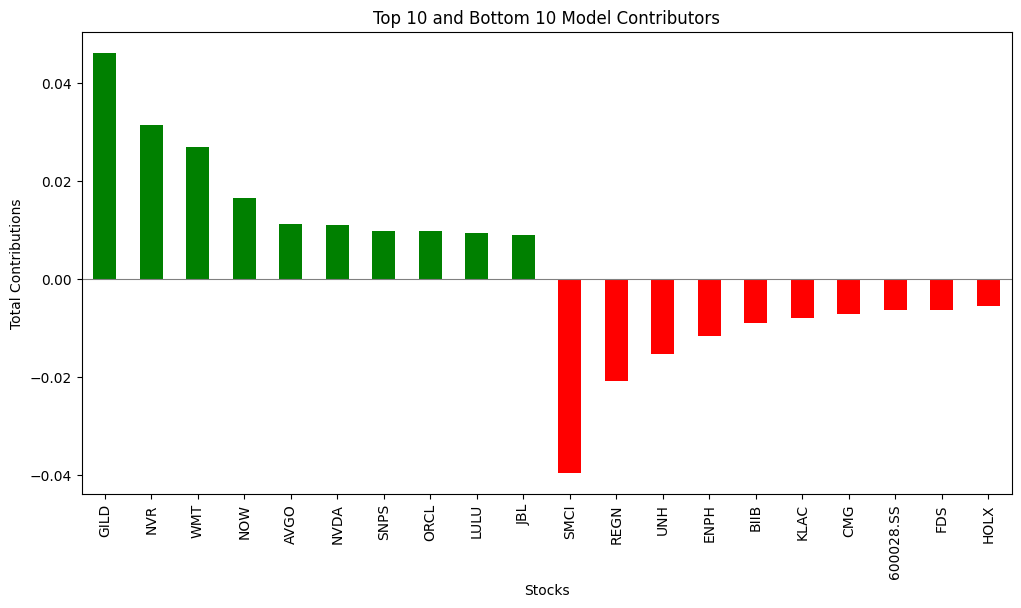

In [33]:
show_contrib(model_contrib_df, 'Model')

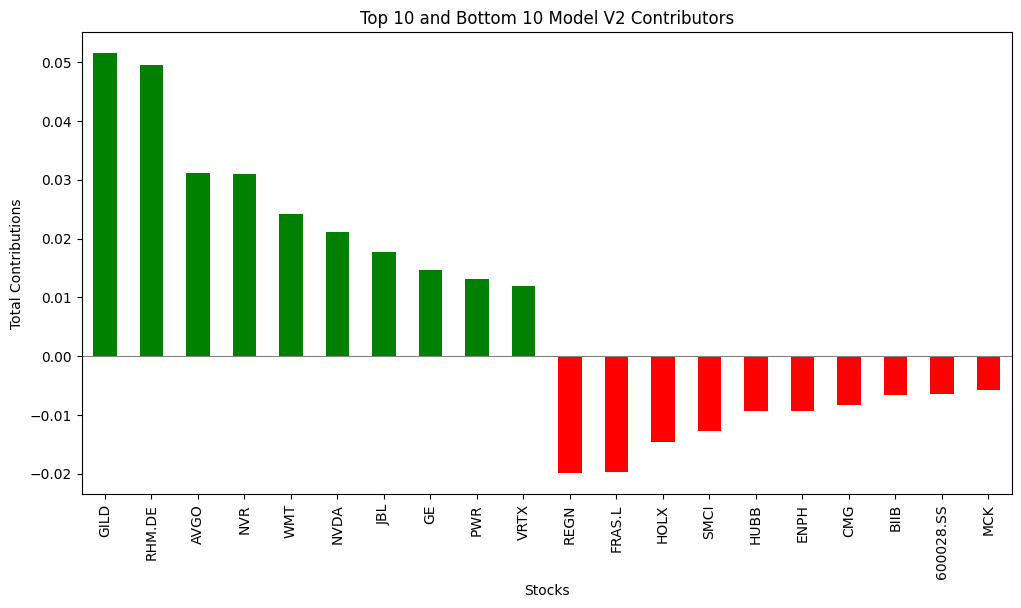

In [34]:
show_contrib(model_v2_contrib_df, 'Model V2')

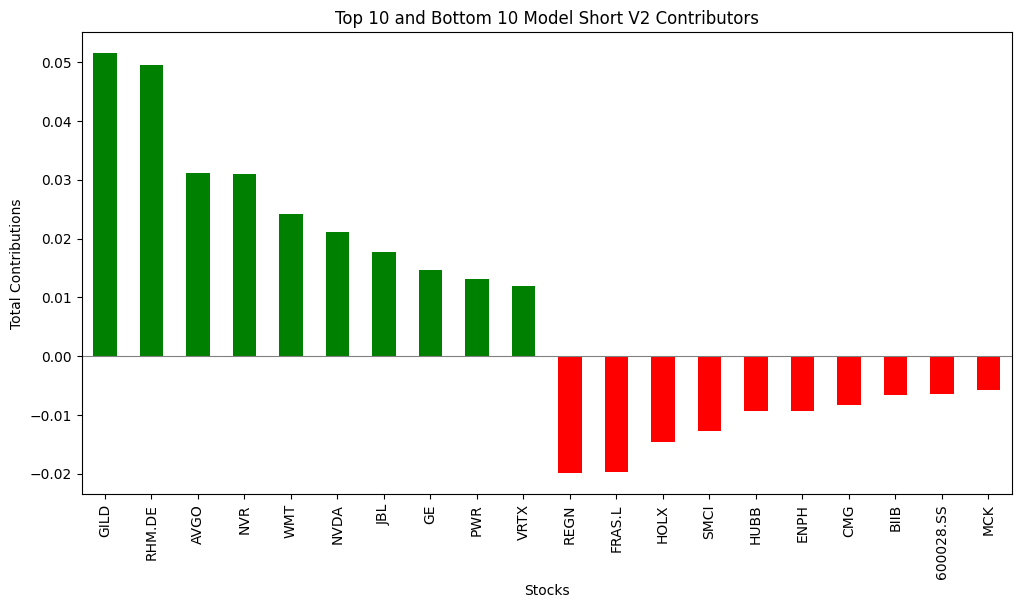

In [35]:
show_contrib(model_v2_contrib_df, 'Model Short V2')

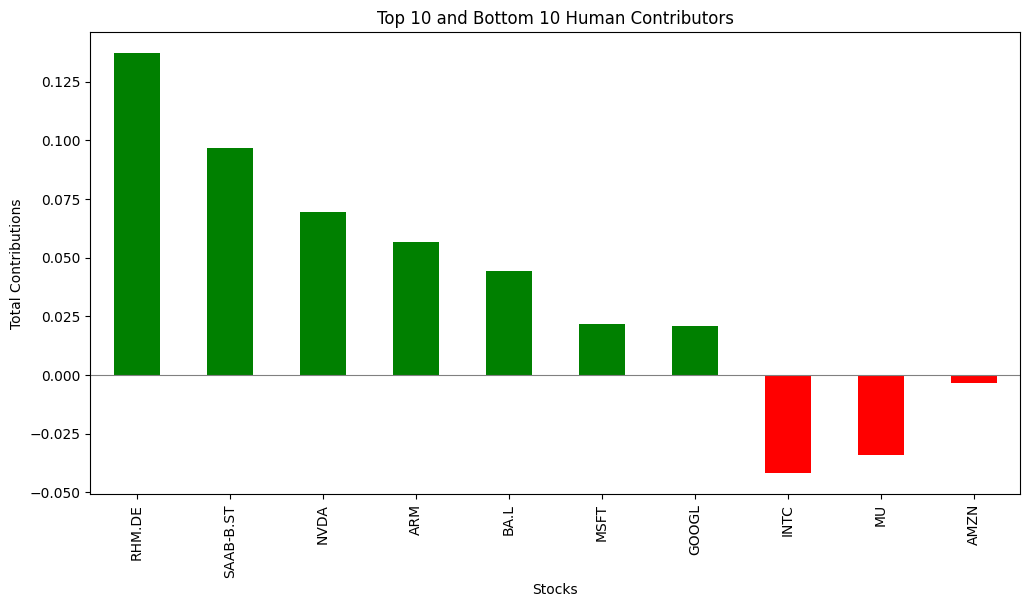

In [36]:
show_contrib(human_contrib_df, 'Human')

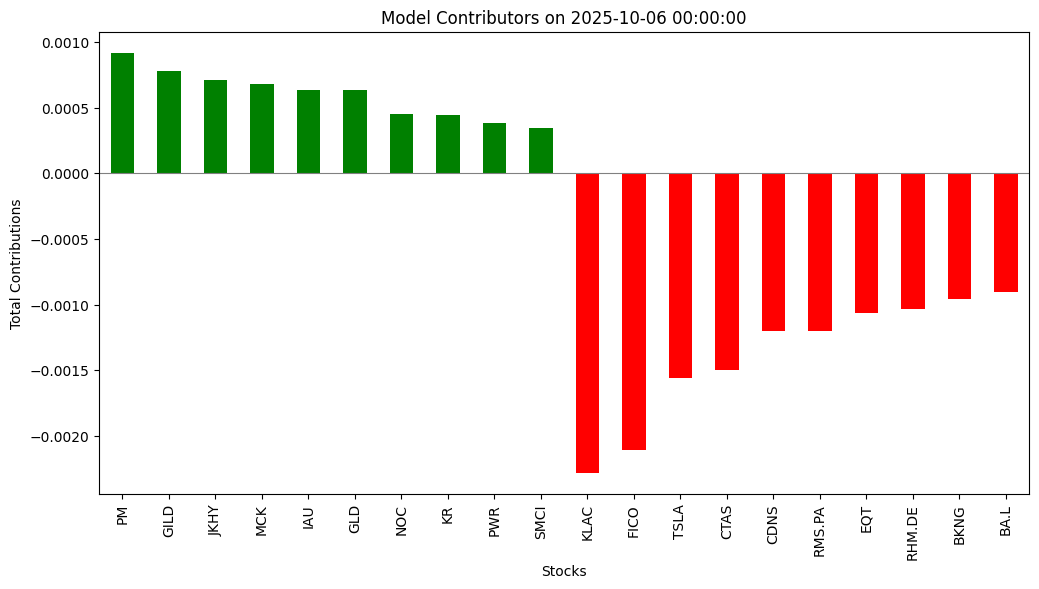

In [37]:
show_contrib(model_contrib_df, 'Model', -5)

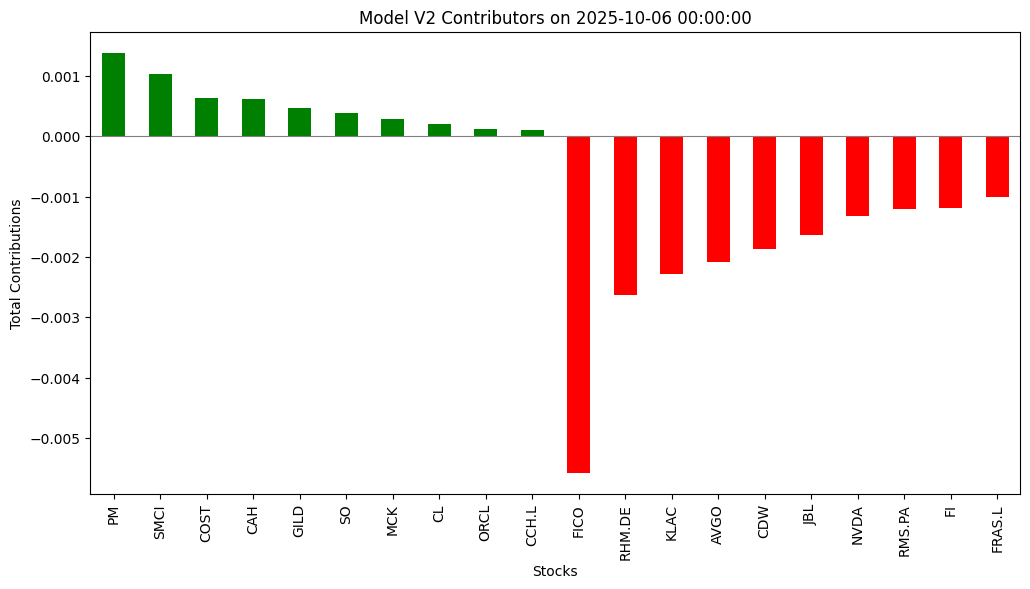

In [38]:
show_contrib(model_v2_contrib_df, 'Model V2', -5)

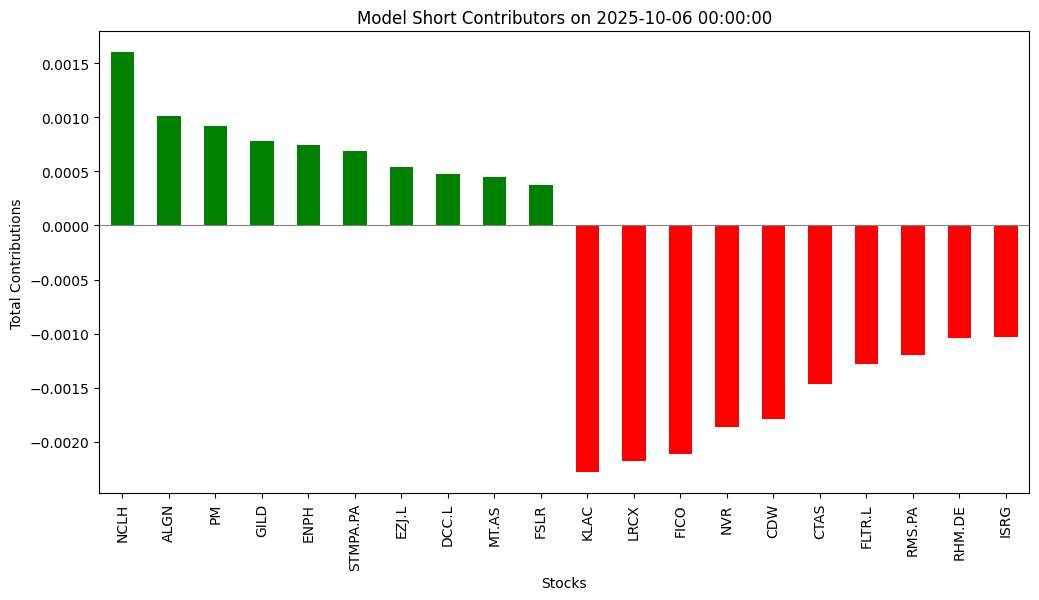

In [39]:
show_contrib(model_short_contrib_df, 'Model Short', -5)

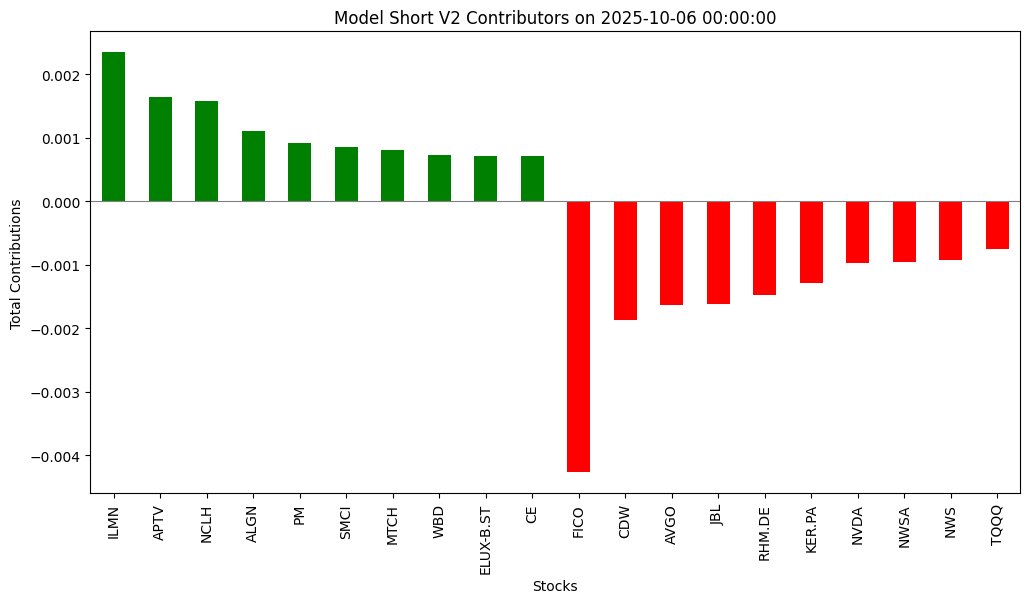

In [40]:
show_contrib(model_short_v2_contrib_df, 'Model Short V2', -5)

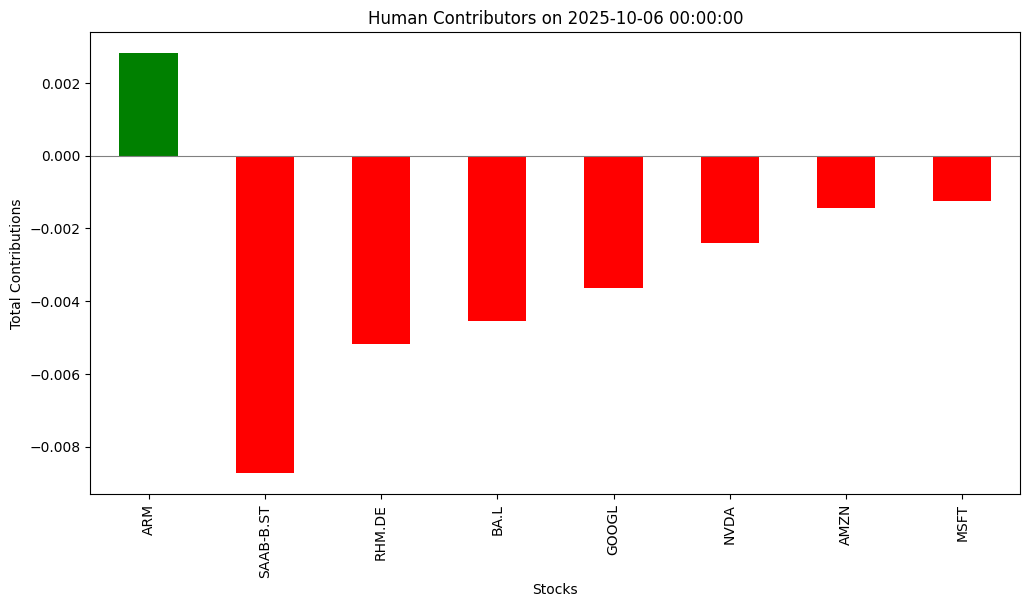

In [41]:
show_contrib(human_contrib_df, 'Human', -5)

In [43]:
def add_vertical_line(fig, date, annotation, cur_asset_model_hist, cur_asset_human_hist, cur_asset_sp500_hist):
    # Adding a vertical line and annotation
    combined_hist = cur_asset_model_hist + cur_asset_human_hist + cur_asset_sp500_hist

    fig.add_shape(
        dict(
            type="line",
            x0=date,
            y0=min(combined_hist),
            x1=date,
            y1=max(combined_hist),
            line=dict(
                color="blue",
                width=1
            )
        )
    )

    fig.add_annotation(
        dict(
            x=date,
            y=max(combined_hist),
            text=annotation,
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-40
        )
    )

In [44]:
# use plotly to plot the curve of the three assets
import plotly.graph_objects as go

fig = go.Figure()
date_list = log_return.index.tolist()
date_list.insert(0, pd.Timestamp('2024-05-14'))

#fig.add_trace(go.Scatter(x=date_list, y=cur_asset_model_hist, mode='lines', name='Model'))
fig.add_trace(go.Scatter(x=date_list, y=cur_asset_model_v2_hist, mode='lines', name='Model Multi'))
#fig.add_trace(go.Scatter(x=date_list, y=cur_asset_model_short_hist, mode='lines', name='Model Short'))
fig.add_trace(go.Scatter(x=date_list, y=cur_asset_model_short_v2_hist, mode='lines', name='Model Short Multi'))
#fig.add_trace(go.Scatter(x=date_list, y=cur_asset_model_shorter_short_v2_hist, mode='lines', name='Model Shorter Short Multi'))
#fig.add_trace(go.Scatter(x=date_list, y=cur_asset_model_perplexity_hist, mode='lines', name='Perplexity.ai'))
#fig.add_trace(go.Scatter(x=date_list, y=cur_asset_model_perplexity_r1_hist, mode='lines', name='Perplexity.ai-R1'))
fig.add_trace(go.Scatter(x=date_list, y=cur_asset_human_hist, mode='lines', name='Human'))
fig.add_trace(go.Scatter(x=date_list, y=cur_asset_sp500_hist, mode='lines', name='SP500'))
fig.add_trace(go.Scatter(x=date_list, y=cur_asset_model_v2025_hist, mode='lines', name='Model Multi v2025'))
fig.add_trace(go.Scatter(x=date_list, y=cur_asset_model_short_v2025_hist, mode='lines', name='Model Short Multi v2025'))

add_vertical_line(fig, '2024-07-20', 'global selectKBest', cur_asset_model_hist, cur_asset_human_hist, cur_asset_sp500_hist)
add_vertical_line(fig, '2024-10-10', 'multi-horizon', cur_asset_model_hist, cur_asset_human_hist, cur_asset_sp500_hist)
add_vertical_line(fig, '2024-11-30', 'Short models', cur_asset_model_hist, cur_asset_human_hist, cur_asset_sp500_hist)
add_vertical_line(fig, '2025-10-05', 'v2025!', cur_asset_model_hist, cur_asset_human_hist, cur_asset_sp500_hist)
fig.show()


In [135]:
# remove the columns with all zeros
recent_df = model_short_v2_contrib_df[-11:].loc[:, (model_short_v2_contrib_df[-11:] != 0).any(axis=0)]
# find out the max value and the column name for the max value for each row
recent_df_max = recent_df.max(axis=1)
recent_df_max['max_column'] = recent_df.idxmax(axis=1)
recent_df_max





KeyboardInterrupt: 

In [330]:
recent_df

,AAL,ABBV,ALGN,ALO.PA,ANTO.L,APTV,ARE,AVGO,BA,BAYN.DE,...,RHM.DE,RIO.L,SHEL.L,SMCI,STAN.L,TEP.PA,TMUS,TSN,WBA,WBD
2025-04-25,0.000145,0.000311,0.000173,0.000000,0.000000,0.000000,0.000180,0.001122,-0.000095,-0.000480,...,0.000045,-0.000000,0.000000,0.001096,0.000000,-0.000011,0.002380,-0.000131,0.000054,-0.000211
2025-04-26,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
2025-04-27,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
2025-04-28,0.000000,0.000332,0.000458,0.000000,0.000080,-0.000014,-0.000144,0.000042,0.000000,-0.000021,...,-0.000378,0.000086,-0.000055,0.001302,0.000225,0.000000,-0.000170,-0.000084,0.000109,-0.000183
2025-04-29,0.000000,0.000061,0.000688,-0.000000,-0.000111,-0.000053,0.000590,-0.000339,-0.000000,-0.000281,...,0.000058,-0.000157,0.000048,-0.002080,-0.000349,-0.000000,-0.000202,0.000078,0.000110,-0.000116
2025-04-30,0.000050,0.000000,0.000855,-0.000115,-0.000000,0.000103,-0.000012,0.000362,-0.000068,0.000156,...,0.001690,-0.000000,-0.000000,-0.007330,-0.000000,-0.000248,-0.000219,0.000108,-0.000125,0.000229
2025-05-01,0.000000,-0.000000,-0.000722,-0.000000,0.000000,-0.000000,-0.000104,0.001359,0.000019,-0.000000,...,0.000000,-0.000000,-0.000000,0.001616,0.000000,-0.000000,-0.000002,-0.000103,0.000136,0.000561
2025-05-02,0.000193,0.000000,-0.000626,-0.000026,0.000000,-0.000347,-0.000142,0.001734,-0.000140,-0.000561,...,0.000657,0.000000,0.000000,0.001770,-0.000000,0.000756,-0.000062,0.000030,-0.000159,-0.000259
2025-05-03,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
2025-05-04,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000


In [ ]:
import pandas as pd

data_dir = "./processed_data_128"
S = pd.read_pickle(f'{data_dir}/S.pkl')
mu = np.load(f'{data_dir}/mu.npy')

# load valid_tickers.txt
with open(f'{data_dir}/valid_tickers.txt', 'r') as f:
    valid_tickers = f.read().splitlines()



In [122]:
print(len(valid_tickers))
print(len(mu))
print(S.shape)

746
746
(746, 746)


In [123]:
print(S.columns)

Index(['ADS.DE', 'AIR.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE',
       'BNR.DE', 'CBK.DE', 'CON.DE',
       ...
       'IUSG', 'VGK', 'EFV', 'XLI', 'SHV', 'XLY', 'ACWI', 'IUSV', 'IYW',
       'VHT'],
      dtype='object', length=746)


In [124]:
print(valid_tickers)

['ADS.DE', 'AIR.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'BNR.DE', 'CBK.DE', 'CON.DE', 'DBK.DE', 'DB1.DE', 'DHL.DE', 'DTE.DE', 'EOAN.DE', 'FRE.DE', 'HNR1.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'MBG.DE', 'MRK.DE', 'MTX.DE', 'MUV2.DE', 'PAH3.DE', 'QIA.DE', 'RHM.DE', 'RWE.DE', 'SAP.DE', 'SRT3.DE', 'SIE.DE', 'SY1.DE', 'VOW3.DE', 'VNA.DE', 'III.L', 'ADM.L', 'AAL.L', 'ANTO.L', 'AHT.L', 'ABF.L', 'AZN.L', 'AV.L', 'BA.L', 'BARC.L', 'BDEV.L', 'BEZ.L', 'BKG.L', 'BP.L', 'BATS.L', 'BT-A.L', 'BNZL.L', 'BRBY.L', 'CNA.L', 'CCH.L', 'CPG.L', 'CRDA.L', 'DCC.L', 'DGE.L', 'DPLM.L', 'ENT.L', 'EZJ.L', 'EXPN.L', 'FCIT.L', 'FLTR.L', 'FRAS.L', 'FRES.L', 'GLEN.L', 'GSK.L', 'HLMA.L', 'HIK.L', 'HWDN.L', 'HSBA.L', 'IHG.L', 'IMI.L', 'IMB.L', 'INF.L', 'ICP.L', 'IAG.L', 'ITRK.L', 'JD.L', 'KGF.L', 'LAND.L', 'LGEN.L', 'LLOY.L', 'LSEG.L', 'MKS.L', 'MRO.L', 'MNDI.L', 'NG.L', 'NWG.L', 'NXT.L', 'OCDO.L', 'PSON.L', 'PSN.L', 'PHNX.L', 'PRU.L', 'RKT.L', 'REL.L', 'RTO.L', 'RMV.L', 'RIO.L', 'RR.L', 'RS1.L', 'SGE.L', 

In [125]:
# plot the mean and variance, the X axis is the std, the Y axis is the mean
# the vaiance is the diagonal of the covariance matrix
# if the ticker name contains .SS, it is a Chinese stock, mark it with red color
# if the ticker name contains .DE, it is a German stock, mark
# if the ticker name contains .L, it is a London stock, mark it with green color

# Prepare the data for plotting
standard_deviation = np.sqrt(np.diag(S))

# Create the figure
fig = go.Figure()

# Define a function to get marker styles based on ticker
def get_marker_style(ticker):
    if ".SS" in ticker:
        return dict(symbol='circle', color='red')
    elif ".ST" in ticker:
        return dict(symbol='square', color='blue')
    elif ".DE" in ticker:
        return dict(symbol='diamond', color='green')
    elif ".L" in ticker:
        return dict(symbol='hexagon', color='purple')
    else:
        return dict(symbol='cross', color='black')

# Add each ticker to the plot with appropriate marker style
for i, ticker in enumerate(valid_tickers):
    marker_style = get_marker_style(ticker)
    fig.add_trace(go.Scatter(
        x=[standard_deviation[i]],
        y=[mu[i]],
        mode='markers',
        marker=marker_style,
        text=[ticker],
        hoverinfo='text'
    ))

# Update layout
fig.update_layout(
    title='Stocks Risk and Return',
    yaxis_title='Expected Return',
    xaxis_title='Standard Deviation'
)

# Show the figure
fig.show()


In [126]:
import torch
import numpy as np
import concurrent.futures

# Defining the objective function and constraints
def portfolio_variance(weights, mu_tensor, S_tensor):
    return torch.dot(weights.T, torch.matmul(S_tensor, weights))

def optimize_portfolio(mean, mu_tensor, S_tensor, num_assets, bounds_tensor):
    # Initial guess
    weights = torch.full((num_assets,), 1 / num_assets, dtype=torch.float32, requires_grad=True)

    optimizer = torch.optim.Adam([weights], lr=0.01)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=100, verbose=True)

    for _ in range(1500):  # Number of iterations
        optimizer.zero_grad()

        var = portfolio_variance(weights, mu_tensor, S_tensor)
        mean_return = torch.dot(weights, mu_tensor)
        constraint_loss = (mean_return - mean) ** 2
        unit_sum_constraint = (torch.sum(weights) - 1) ** 2
        loss = var + constraint_loss + unit_sum_constraint
        loss.backward()

        # Applying bounds
        with torch.no_grad():
            weights.clamp_(bounds_tensor[:, 0], bounds_tensor[:, 1])

        optimizer.step()
        scheduler.step(loss)

    return weights.detach().numpy()

In [127]:
def optimize_portfolio_2(mean, mu_tensor, S_tensor, num_assets, bounds_tensor):
    # Initial guess
    weights = torch.full((num_assets,), 1 / num_assets, dtype=torch.float32, requires_grad=True)

    optimizer = torch.optim.Adam([weights], lr=0.01)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=100, verbose=True)
    lower_bound_tensor = torch.zeros(num_assets)  # `0.0` tensor for the lower bound

    for _ in range(1500):  # Number of iterations
        optimizer.zero_grad()

        var = portfolio_variance(weights, mu_tensor, S_tensor)
        mean_return = torch.dot(weights, mu_tensor)
        constraint_loss = (mean_return - mean) ** 2
        unit_sum_constraint = (torch.sum(weights) - 1) ** 2
        loss = var + constraint_loss + unit_sum_constraint
        loss.backward()

        optimizer.step()

        # Manually applying complex bounds
        with torch.no_grad():
            weights.clamp_(lower_bound_tensor, bounds_tensor[:, 1])  # Initially, apply simple upper bound
            # Applying zero or lower limit of the range (0.02)
            weights.copy_(torch.where((weights > 0) & (weights < 0.02), torch.full_like(weights, 0.02), weights))
            weights.copy_(torch.where(weights < 0.01, torch.zeros_like(weights), weights))

        scheduler.step(loss)

    return weights.detach().numpy()


num_assets = len(valid_tickers)
# Example bounds setup where weight is 0 or between 0.02 and 0.2
bounds = np.array([(0, 0.2)] * num_assets)  # Although redundant if manually handling bounds in the loop
bounds_tensor = torch.tensor(bounds, dtype=torch.float32)

In [128]:
# Assuming 'S' is a pandas DataFrame
import torch

S_tensor = torch.tensor(S.values, dtype=torch.float32)
# Assuming 'mu' is a NumPy array
mu_tensor = torch.tensor(mu, dtype=torch.float32)
num_assets = len(mu)
bounds = np.array([(0.0, 0.2)] * num_assets, dtype=np.float32)
bounds_tensor = torch.tensor(bounds, dtype=torch.float32)


efficient_means = np.linspace(-0.1, 0.3, 16)  # Custom range of target returns for the efficient frontier

# Run optimization sequentially
efficient_portfolios = []

for mean in efficient_means:
    print(f'Optimizing for target mean return: {mean}')
    result = optimize_portfolio(mean, mu_tensor, S_tensor, num_assets, bounds_tensor)
    efficient_portfolios.append(result)


Optimizing for target mean return: -0.1


/home/ken/anaconda3/envs/stock/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning:

The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.

/tmp/ipykernel_2733660/2726612700.py:7: UserWarning:

The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)



Optimizing for target mean return: -0.07333333333333333
Optimizing for target mean return: -0.04666666666666667
Optimizing for target mean return: -0.020000000000000004
Optimizing for target mean return: 0.006666666666666668
Optimizing for target mean return: 0.033333333333333326
Optimizing for target mean return: 0.06
Optimizing for target mean return: 0.08666666666666667
Optimizing for target mean return: 0.11333333333333334
Optimizing for target mean return: 0.14
Optimizing for target mean return: 0.16666666666666666
Optimizing for target mean return: 0.19333333333333333
Optimizing for target mean return: 0.22
Optimizing for target mean return: 0.24666666666666667
Optimizing for target mean return: 0.2733333333333333
Optimizing for target mean return: 0.3


In [129]:

# Convert portfolios to Torch tensors and calculate portfolio variances
efficient_risks = [portfolio_variance(torch.tensor(portfolio, dtype=torch.float32), mu_tensor, S_tensor).sqrt().item() for portfolio in efficient_portfolios]

# Print out results
for i, (risk, mean_return) in enumerate(zip(efficient_risks, efficient_means)):
    print(f'Portfolio {i+1}: Target Mean Return = {mean_return:.4f}, Standard Deviation = {risk:.4f}')

Portfolio 1: Target Mean Return = -0.1000, Standard Deviation = 0.0559
Portfolio 2: Target Mean Return = -0.0733, Standard Deviation = 0.0463
Portfolio 3: Target Mean Return = -0.0467, Standard Deviation = 0.0374
Portfolio 4: Target Mean Return = -0.0200, Standard Deviation = 0.0255
Portfolio 5: Target Mean Return = 0.0067, Standard Deviation = 0.0212
Portfolio 6: Target Mean Return = 0.0333, Standard Deviation = 0.0196
Portfolio 7: Target Mean Return = 0.0600, Standard Deviation = 0.0225
Portfolio 8: Target Mean Return = 0.0867, Standard Deviation = 0.0279
Portfolio 9: Target Mean Return = 0.1133, Standard Deviation = 0.0345
Portfolio 10: Target Mean Return = 0.1400, Standard Deviation = 0.0420
Portfolio 11: Target Mean Return = 0.1667, Standard Deviation = 0.0525
Portfolio 12: Target Mean Return = 0.1933, Standard Deviation = 0.0572
Portfolio 13: Target Mean Return = 0.2200, Standard Deviation = 0.0629
Portfolio 14: Target Mean Return = 0.2467, Standard Deviation = 0.0691
Portfolio 1

In [130]:
risk_free_rate = 0.02
period = 128


sharpe_ratios = [(y - risk_free_rate) / x for x, y in zip(efficient_risks, efficient_means)]
max_sharpe_idx = np.argmax(sharpe_ratios)

weights = efficient_portfolios[max_sharpe_idx]

tickers_to_buy = []
tot_weight = 0
for index, ticker_name in enumerate(valid_tickers):
    weight = float(weights[index])

    if weight > 1e-3:
        print(f'index: {index} {ticker_name}: weight {weight} exp profit: {mu[index]}, variance: {S[ticker_name][ticker_name]}')
        ticker_info = {'id': ticker_name, 'weight': weight}
        tickers_to_buy.append(ticker_info)
        tot_weight += weight

print(tot_weight)

index: 26 RHM.DE: weight 0.00706928176805377 exp profit: 0.1171946693427728, variance: 0.12132488757961972
index: 64 FRAS.L: weight 0.008537979796528816 exp profit: 0.16201405330405264, variance: 0.08560801786100544
index: 190 BIIB: weight 0.08246753364801407 exp profit: 0.16006605352059342, variance: 0.08081750771001889
index: 199 AVGO: weight 0.14243678748607635 exp profit: 0.18871316059035945, variance: 0.04236827432490816
index: 225 CMG: weight 0.05268765240907669 exp profit: 0.16941279221032682, variance: 0.04363383748644906
index: 284 LLY: weight 0.04469626396894455 exp profit: 0.10655853839031226, variance: 0.032542798173193735
index: 290 EQT: weight 0.010811909101903439 exp profit: 0.07231512984174181, variance: 0.15862819231851566
index: 306 FICO: weight 0.06412819027900696 exp profit: 0.16099868488330352, variance: 0.05005473978326946
index: 329 GILD: weight 0.13463686406612396 exp profit: 0.14714565531522172, variance: 0.025172741323176966
index: 342 HOLX: weight 0.079181112

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.optimize import minimize
import concurrent.futures

# Prepare the data for plotting
standard_deviation = np.sqrt(np.diag(S))
expected_returns = mu

# Define a function to get marker styles based on ticker
def get_marker_style(ticker):
    if ".SS" in ticker:
        return dict(symbol='circle', color='red')
    elif ".ST" in ticker:
        return dict(symbol='square', color='blue')
    elif ".DE" in ticker:
        return dict(symbol='diamond', color='green')
    elif ".L" in ticker:
        return dict(symbol='hexagon', color='purple')
    else:
        return dict(symbol='cross', color='black')

# Add individual stocks
fig = go.Figure()

for i, ticker in enumerate(valid_tickers):
    marker_style = get_marker_style(ticker)
    fig.add_trace(go.Scatter(
        x=[standard_deviation[i]],
        y=[expected_returns[i]],
        mode='markers',
        marker=marker_style,
        text=[ticker],
        hoverinfo='text'
    ))

# Define portfolio statistics functions
def portfolio_stats(weights, mu, cov_matrix):
    expected_return = np.dot(weights, mu)
    expected_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    expected_std_dev = np.sqrt(expected_variance)
    return expected_return, expected_variance, expected_std_dev

# Number of portfolios to simulate
num_portfolios = 10000
num_assets = len(mu)
results = np.zeros((3, num_portfolios))

# Define the risk-free rate (for example, assume 0)
risk_free_rate = 0.02

# Optimize portfolios to draw efficient frontier
def min_variance(weights, mu, S):
    return portfolio_stats(weights, mu, S)[2] ** 2



def optimize_portfolio(mean, mu, S, num_assets, bounds):
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: portfolio_stats(x, mu, S)[0] - mean})
    result = minimize(min_variance, num_assets * [1./num_assets,], args=(mu, S),
                       method='SLSQP', bounds=bounds, constraints=constraints, options={"maxiter": 200})
    return result

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0.0,0.2) for _ in range(num_assets))
efficient_means = np.linspace(-0.1, 0.3, 32)

# Use ThreadPoolExecutor to parallelize the computation
efficient_portfolios = []
total_tasks = len(efficient_means)

# Use ThreadPoolExecutor to parallelize the computation
with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
    future_to_mean = {executor.submit(optimize_portfolio, mean, mu, S, num_assets, bounds): mean for mean in efficient_means}
    completed_tasks = 0
    for future in concurrent.futures.as_completed(future_to_mean):
        completed_tasks += 1
        print(f'{completed_tasks}/{total_tasks} tasks completed')
        efficient_portfolios.append(future.result())


efficient_risks = [portfolio['fun'] ** 0.5 for portfolio in efficient_portfolios]

# Plot the efficient frontier
fig.add_trace(go.Scatter(
    x=efficient_risks,
    y=efficient_means,
    mode='lines',
    line=dict(color='black', width=3),
    name='Efficient Frontier'
))


# Calculate Sharpe Ratios for efficient portfolios
risk_free_rate = 0.02
sharpe_ratios = [(y - risk_free_rate) / x for x, y in zip(efficient_risks, efficient_means)]
max_sharpe_idx = np.argmax(sharpe_ratios)

# Tangency point on the efficient frontier
tangency_risk = efficient_risks[max_sharpe_idx]
tangency_return = efficient_means[max_sharpe_idx]
tangency_portfolio = efficient_portfolios[max_sharpe_idx]


# Plot the tangency point
fig.add_trace(go.Scatter(
    x=[tangency_risk],
    y=[tangency_return],
    mode='markers',
    marker=dict(color='gold', size=10, symbol='star'),
    name='Tangency Portfolio'
))

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_risk * 1.5]  # Extend the CML to the right of the tangency point
cml_y = [risk_free_rate, risk_free_rate + (tangency_return - risk_free_rate) / tangency_risk * (tangency_risk * 1.5)]

fig.add_trace(go.Scatter(
    x=cml_x,
    y=cml_y,
    mode='lines',
    line=dict(color='orange', width=2, dash='dash'),
    name='Capital Market Line (CML)'
))

# Update layout
fig.update_layout(
    title='Stocks Risk and Return and Efficient Frontier',
    yaxis_title='Expected Return',
    xaxis_title='Standard Deviation'
)

# Show the figure
fig.show()


1/32 tasks completed


In [ ]:
def portfolio_volatility(weights, covariance_log_returns):
    covariance_returns = np.exp(covariance_log_returns) - 1
    return np.sqrt(np.dot(weights.T, np.dot(covariance_returns, weights)))

def portfolio_return(weights, log_returns, allow_short=False):
    returns = np.exp(log_returns) - 1
    return np.sum(np.abs(returns)*weights) if allow_short else np.sum(returns*weights)

period = 128

weights = tangency_portfolio.x
tickers_to_buy = []
tot_weight = 0

for index, ticker_name in enumerate(valid_tickers):
  weight = float(weights[index])
  tot_weight += weight
  if weight > 1e-2:
    print(f'index: {index} {ticker_name}: weight {weight} exp profit: {mu[index]}, variance: {S[ticker_name][ticker_name]}')
    ticker_info = {'id': ticker_name, 'weight': weight}
    tickers_to_buy.append(ticker_info)


print(f'expected return in {period} trading days: {portfolio_return(weights, mu)}')
print(f'volatility of the return in {period} trading days: {portfolio_volatility(weights, S)}')
print(tot_weight)
# print tickers_to_buy in JSON format

In [ ]:
tangency_portfolio

In [ ]:
# based on the names in the valid_tickers, filter out the stocks with .SS as suffix
import torch


S_china = S.copy()
mu_china = mu.copy()

# get the index of the stocks with .SS as suffix
china_idx = [i for i, ticker in enumerate(valid_tickers) if ".SS" in ticker]

# filter out the stocks with .SS as suffix
S_china = S_china.iloc[china_idx, china_idx]
mu_china = mu_china[china_idx]

# Assuming 'S' is a pandas DataFrame
S_tensor_china = torch.tensor(S_china.values, dtype=torch.float32)
# Assuming 'mu' is a NumPy array
mu_tensor_china = torch.tensor(mu_china, dtype=torch.float32)
num_assets_china = len(mu_china)
# Configure optimization constraints and bounds
bounds = np.array([(0.02, 0.2)] * num_assets_china, dtype=np.float32)
bounds_tensor = torch.tensor(bounds, dtype=torch.float32)
efficient_means_china = np.linspace(-0.1, 0.3, 32)  # Custom range of target returns for the efficient frontier

# Run optimization sequentially
efficient_portfolios_china = []

for mean in efficient_means_china:
    print(f'Optimizing for target mean return: {mean}')
    result = optimize_portfolio(mean, mu_tensor_china, S_tensor_china, num_assets_china, bounds_tensor)
    efficient_portfolios_china.append(result)

# Convert portfolios to Torch tensors and calculate portfolio variances
efficient_risks_china = [portfolio_variance(torch.tensor(portfolio, dtype=torch.float32), mu_tensor_china, S_tensor_china).sqrt().item() for portfolio in efficient_portfolios_china]

# Print out results
for i, (risk, mean_return) in enumerate(zip(efficient_risks_china, efficient_means_china)):
    print(f'Portfolio {i+1}: Target Mean Return = {mean_return:.4f}, Standard Deviation = {risk:.4f}')


In [ ]:
# based on the names in the valid_tickers, filter out the stocks with .SS as suffix
import torch


S_sweden = S.copy()
mu_sweden = mu.copy()

# get the index of the stocks with .SS as suffix
sweden_idx = [i for i, ticker in enumerate(valid_tickers) if ".ST" in ticker]

# filter out the stocks with .SS as suffix
S_sweden = S_sweden.iloc[sweden_idx, sweden_idx]
mu_sweden = mu_sweden[sweden_idx]

# Assuming 'S' is a pandas DataFrame
S_tensor_sweden = torch.tensor(S_sweden.values, dtype=torch.float32)
# Assuming 'mu' is a NumPy array
mu_tensor_sweden = torch.tensor(mu_sweden, dtype=torch.float32)
num_assets_sweden = len(mu_sweden)
# Configure optimization constraints and bounds
bounds = np.array([(0, 0.2)] * num_assets_sweden, dtype=np.float32)
bounds_tensor = torch.tensor(bounds, dtype=torch.float32)
efficient_means_sweden = np.linspace(-0.1, 0.3, 32)  # Custom range of target returns for the efficient frontier

# Run optimization sequentially
efficient_portfolios_sweden = []

for mean in efficient_means_sweden:
    print(f'Optimizing for target mean return: {mean}')
    result = optimize_portfolio(mean, mu_tensor_sweden, S_tensor_sweden, num_assets_sweden, bounds_tensor)
    efficient_portfolios_sweden.append(result)

# Convert portfolios to Torch tensors and calculate portfolio variances
efficient_risks_sweden = [portfolio_variance(torch.tensor(portfolio, dtype=torch.float32), mu_tensor_sweden, S_tensor_sweden).sqrt().item() for portfolio in efficient_portfolios_sweden]

# Print out results
for i, (risk, mean_return) in enumerate(zip(efficient_risks_sweden, efficient_means_sweden)):
    print(f'Portfolio {i+1}: Target Mean Return = {mean_return:.4f}, Standard Deviation = {risk:.4f}')

In [ ]:
# based on the names in the valid_tickers, filter out the stocks with .SS as suffix
import torch


S_germany = S.copy()
mu_germany = mu.copy()

# get the index of the stocks with .SS as suffix
germany_idx = [i for i, ticker in enumerate(valid_tickers) if ".DE" in ticker]

# filter out the stocks with .SS as suffix
S_germany = S_germany.iloc[germany_idx, germany_idx]
mu_germany = mu_germany[germany_idx]

# Assuming 'S' is a pandas DataFrame
S_tensor_germany = torch.tensor(S_germany.values, dtype=torch.float32)
# Assuming 'mu' is a NumPy array
mu_tensor_germany = torch.tensor(mu_germany, dtype=torch.float32)
num_assets_germany = len(mu_germany)
# Configure optimization constraints and bounds
bounds = np.array([(0, 0.2)] * num_assets_germany, dtype=np.float32)
bounds_tensor = torch.tensor(bounds, dtype=torch.float32)
efficient_means_germany = np.linspace(-0.1, 0.3, 32)  # Custom range of target returns for the efficient frontier

# Run optimization sequentially
efficient_portfolios_germany = []

for mean in efficient_means_germany:
    print(f'Optimizing for target mean return: {mean}')
    result = optimize_portfolio(mean, mu_tensor_germany, S_tensor_germany, num_assets_germany, bounds_tensor)
    efficient_portfolios_germany.append(result)

# Convert portfolios to Torch tensors and calculate portfolio variances
efficient_risks_germany = [portfolio_variance(torch.tensor(portfolio, dtype=torch.float32), mu_tensor_germany, S_tensor_germany).sqrt().item() for portfolio in efficient_portfolios_germany]

# Print out results
for i, (risk, mean_return) in enumerate(zip(efficient_risks_germany, efficient_means_germany)):
    print(f'Portfolio {i+1}: Target Mean Return = {mean_return:.4f}, Standard Deviation = {risk:.4f}')

In [ ]:
# based on the names in the valid_tickers, filter out the stocks with .SS as suffix
import torch


S_uk = S.copy()
mu_uk = mu.copy()

# get the index of the stocks with .SS as suffix
uk_idx = [i for i, ticker in enumerate(valid_tickers) if ".L" in ticker]

# filter out the stocks with .SS as suffix
S_uk = S_uk.iloc[uk_idx, uk_idx]
mu_uk = mu_uk[uk_idx]

# Assuming 'S' is a pandas DataFrame
S_tensor_uk = torch.tensor(S_uk.values, dtype=torch.float32)
# Assuming 'mu' is a NumPy array
mu_tensor_uk = torch.tensor(mu_uk, dtype=torch.float32)
num_assets_uk = len(mu_uk)
# Configure optimization constraints and bounds
bounds = np.array([(0, 0.2)] * num_assets_uk, dtype=np.float32)
bounds_tensor = torch.tensor(bounds, dtype=torch.float32)
efficient_means_uk = np.linspace(-0.1, 0.3, 32)  # Custom range of target returns for the efficient frontier

# Run optimization sequentially
efficient_portfolios_uk = []

for mean in efficient_means_uk:
    print(f'Optimizing for target mean return: {mean}')
    result = optimize_portfolio(mean, mu_tensor_uk, S_tensor_uk, num_assets_uk, bounds_tensor)
    efficient_portfolios_uk.append(result)

# Convert portfolios to Torch tensors and calculate portfolio variances
efficient_risks_uk = [portfolio_variance(torch.tensor(portfolio, dtype=torch.float32), mu_tensor_uk, S_tensor_uk).sqrt().item() for portfolio in efficient_portfolios_uk]

# Print out results
for i, (risk, mean_return) in enumerate(zip(efficient_risks_uk, efficient_means_uk)):
    print(f'Portfolio {i+1}: Target Mean Return = {mean_return:.4f}, Standard Deviation = {risk:.4f}')


In [ ]:
# based on the names in the valid_tickers, filter out the stocks with .SS as suffix
import torch


S_us = S.copy()
mu_us = mu.copy()

# get the index of the stocks without suffix
us_idx = [i for i, ticker in enumerate(valid_tickers) if "." not in ticker]


# filter out the stocks with .SS as suffix
S_us = S_us.iloc[us_idx, us_idx]
mu_us = mu_us[us_idx]

# Assuming 'S' is a pandas DataFrame
S_tensor_us = torch.tensor(S_us.values, dtype=torch.float32)
# Assuming 'mu' is a NumPy array
mu_tensor_us = torch.tensor(mu_us, dtype=torch.float32)
num_assets_us = len(mu_us)
# Configure optimization constraints and bounds
bounds = np.array([(0, 0.2)] * num_assets_us, dtype=np.float32)
bounds_tensor = torch.tensor(bounds, dtype=torch.float32)
efficient_means_us = np.linspace(-0.1, 0.3, 32)  # Custom range of target returns for the efficient frontier

# Run optimization sequentially
efficient_portfolios_us = []

for mean in efficient_means_us:
    print(f'Optimizing for target mean return: {mean}')
    result = optimize_portfolio(mean, mu_tensor_us, S_tensor_us, num_assets_us, bounds_tensor)
    efficient_portfolios_us.append(result)

# Convert portfolios to Torch tensors and calculate portfolio variances
efficient_risks_us = [portfolio_variance(torch.tensor(portfolio, dtype=torch.float32), mu_tensor_us, S_tensor_us).sqrt().item() for portfolio in efficient_portfolios_us]

# Print out results
for i, (risk, mean_return) in enumerate(zip(efficient_risks_us, efficient_means_us)):
    print(f'Portfolio {i+1}: Target Mean Return = {mean_return:.4f}, Standard Deviation = {risk:.4f}')

In [ ]:
# Add individual stocks
fig = go.Figure()


# Plot the efficient frontier
fig.add_trace(go.Scatter(
    x=efficient_risks,
    y=efficient_means,
    mode='lines',
    line=dict(color='black', width=3),
    name='Efficient Frontier'
))

# Plot the efficient frontier
fig.add_trace(go.Scatter(
    x=efficient_risks_china,
    y=efficient_means_china,
    mode='lines',
    line=dict(color='red', width=3),
    name='Efficient Frontier China'
))

# Plot the efficient frontier
fig.add_trace(go.Scatter(
    x=efficient_risks_us,
    y=efficient_means_us,
    mode='lines',
    line=dict(color='blue', width=3),
    name='Efficient Frontier US'
))

# Plot the efficient frontier
fig.add_trace(go.Scatter(
    x=efficient_risks_uk,
    y=efficient_means_uk,
    mode='lines',
    line=dict(color='green', width=3),
    name='Efficient Frontier UK'
))

# Plot the efficient frontier
fig.add_trace(go.Scatter(
    x=efficient_risks_sweden,
    y=efficient_means_sweden,
    mode='lines',
    line=dict(color='yellow', width=3),
    name='Efficient Frontier Sweden'
))

# Plot the efficient frontier
fig.add_trace(go.Scatter(
    x=efficient_risks_germany,
    y=efficient_means_germany,
    mode='lines',
    line=dict(color='orange', width=3),
    name='Efficient Frontier Germany'
))

# Calculate Sharpe Ratios for efficient portfolios
risk_free_rate = 0.02
sharpe_ratios = [(y - risk_free_rate) / x for x, y in zip(efficient_risks, efficient_means)]
max_sharpe_idx = np.argmax(sharpe_ratios)

# Tangency point on the efficient frontier
tangency_risk = efficient_risks[max_sharpe_idx]
tangency_return = efficient_means[max_sharpe_idx]

# Plot the tangency point
fig.add_trace(go.Scatter(
    x=[tangency_risk],
    y=[tangency_return],
    mode='markers',
    marker=dict(color='gold', size=10, symbol='star'),
    name='Tangency Portfolio'
))

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_risk * 1.5]  # Extend the CML to the right of the tangency point
cml_y = [risk_free_rate, risk_free_rate + (tangency_return - risk_free_rate) / tangency_risk * (tangency_risk * 1.5)]
fig.add_trace(go.Scatter(
    x=cml_x,
    y=cml_y,
    mode='lines',
    line=dict(color='blue', width=2, dash='dash'),
    name='Capital Market Line'
))

# Plot the Capital Market Line (CML) for China
# Tangency point on the efficient frontier
sharpe_ratios_china = [(y - risk_free_rate) / x for x, y in zip(efficient_risks_china, efficient_means_china)]
max_sharpe_idx_china = np.argmax(sharpe_ratios_china)

tangency_risk_china = efficient_risks_china[max_sharpe_idx_china]
tangency_return_china = efficient_means_china[max_sharpe_idx_china]

# Plot the tangency point
fig.add_trace(go.Scatter(
    x=[tangency_risk_china],
    y=[tangency_return_china],
    mode='markers',
    marker=dict(color='gold', size=10, symbol='star'),
    name='Tangency Portfolio'
))

# Plot the Capital Market Line (CML)
cml_x_china = [0, tangency_risk_china * 1.5]  # Extend the CML to the right of the tangency point
cml_y_china = [risk_free_rate, risk_free_rate + (tangency_return_china - risk_free_rate) / tangency_risk_china * (tangency_risk_china * 1.5)]



fig.add_trace(go.Scatter(
    x=cml_x_china,
    y=cml_y_china,
    mode='lines',
    line=dict(color='orange', width=2, dash='dash'),
    name='Capital Market Line China(CML)'
))

# Prepare the data for plotting
standard_deviation = np.sqrt(np.diag(S))
expected_returns = mu

for i, ticker in enumerate(valid_tickers):
    marker_style = get_marker_style(ticker)
    fig.add_trace(go.Scatter(
        x=[standard_deviation[i]],
        y=[expected_returns[i]],
        mode='markers',
        marker=marker_style,
        text=[ticker],
        hoverinfo='text'
    ))

# Update layout
fig.update_layout(
    title='Stocks Risk and Return and Efficient Frontier',
    yaxis_title='Expected Return',
    xaxis_title='Standard Deviation'
)

# Show the figure
fig.show()


In [ ]:
# Filter valid_tickers to only include those in log_return's columns
filtered_tickers = [ticker for ticker in valid_tickers if ticker in log_return.columns]

# Get the indices of the filtered tickers in S.columns
ticker_indices = [S.columns.get_loc(ticker) for ticker in filtered_tickers]

# Prepare the data for plotting
standard_deviation = np.sqrt(np.diag(S))[ticker_indices]
expected_returns = mu[ticker_indices]

# Create the figure
fig = go.Figure()

# Define a function to get marker styles based on ticker
def get_marker_style(ticker):
    if ".SS" in ticker:
        return dict(symbol='circle', color='red')
    elif ".ST" in ticker:
        return dict(symbol='square', color='blue')
    elif ".DE" in ticker:
        return dict(symbol='diamond', color='green')
    elif ".L" in ticker:
        return dict(symbol='hexagon', color='purple')
    else:
        return dict(symbol='cross', color='black')

# Add each ticker to the plot with appropriate marker style
for i, ticker in enumerate(filtered_tickers):
    marker_style = get_marker_style(ticker)
    fig.add_trace(go.Scatter(
        x=[standard_deviation[i]],
        y=[expected_returns[i]],
        mode='markers',
        marker=marker_style,
        text=[ticker],
        hoverinfo='text'
    ))

# Update layout
fig.update_layout(
    title='Stocks Risk and Return',
    yaxis_title='Expected Return',
    xaxis_title='Standard Deviation'
)

# Show the figure
fig.show()

In [ ]:
ticker_indices

In [ ]:
log_return

In [ ]:
date_list = log_return.index.tolist()
date_list.insert(0, pd.Timestamp('2024-05-14'))
date_list

In [ ]:
log_return.index

In [ ]:

cur_asset = 1
weights = np.zeros(len(unique_ids))
for date in log_return.index:
  # get the date as a string
  date_str = str(date.date())
  print(date_str)
  # enumerate the trade log to see if the date is in the model_trace_log
  for log in human_brain_trace_log:
    if log['date'] == date_str:
      print(log['weights'])
      # build the vector of weights
      # we need to update weights
      for asset in log['weights']:
        asset_id = asset['id']
        asset_weight = asset['weight']
        asset_index = list(unique_ids).index(asset_id)
        weights[asset_index] = asset_weight
  # get the daily profit
  daily_log_return = np.dot(weights, log_return.loc[date].values)
  cur_asset = cur_asset * np.exp(daily_log_return)
  # if the date is in the human_brain_trace

print(cur_asset)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime

yfin.pdr_override()

# Extract unique stock ids and the circular dates needed for periods
unique_ids = set()
dates = [log['date'] for log in model_trace_log]

# Get the start and end date range for the data retrieval
start_date = pd.to_datetime(min(dates))
end_date = pd.to_datetime(max(dates)) + pd.DateOffset(days=1)  # ensuring coverage for the last date's day

# List to store current date + next date for holding period calculations
date_ranges = [(pd.to_datetime(model_trace_log[i]['date']), pd.to_datetime(model_trace_log[i+1]['date']) if i+1 < len(model_trace_log) else pd.to_datetime('now'))
               for i in range(len(model_trace_log))]

# Get unique stock ids from all logs
for log in model_trace_log:
    for weight in log['weights']:
        unique_ids.add(weight['id'])

# Load stock data
stocks_data = pdr.get_data_yahoo(list(unique_ids), start=start_date, end=datetime.datetime.now())

# Fetch the S&P 500 data for the whole period
sp500_data = pdr.get_data_yahoo('^GSPC', start=start_date, end=datetime.datetime.now())

# Calculate the weighted stock prices over time for each log segment
portfolio_value = pd.Series(index=stocks_data['Adj Close'].index)

for start_date, end_date in date_ranges:
    for log in model_trace_log:
        if pd.to_datetime(log['date']) == start_date:
            for asset in log['weights']:
                weight = asset['weight']
                stock_id = asset['id']
                if start_date in stocks_data['Adj Close'].index and stock_id in stocks_data['Adj Close'].columns:
                    price_data = stocks_data['Adj Close'][stock_id].loc[start_date:end_date].fillna(method='ffill')
                    weighted_prices = price_data * weight
                    if portfolio_value[start_date:end_date].empty:
                        portfolio_value[start_date:end_date] = weighted_prices
                    else:
                        portfolio_value[start_date:end_date] += weighted_prices

# Normalize both the portfolio's total value and the S&P 500 to start at 100 (relative comparison)
portfolio_value.dropna(inplace=True)  # Remove any NaN values
portfolio_growth = (portfolio_value / portfolio_value.iloc[0]) * 100
sp500_growth = (sp500_data['Adj Close'] / sp500_data['Adj Close'][0]) * 100

# Plotting the data
plt.figure(figsize=(12, 8))
plt.plot(portfolio_growth.index, portfolio_growth, label='Model Portfolio')
plt.plot(sp500_growth.index, sp500_growth, label='S&P 500', color='red', linestyle='--')
plt.title('Accumulated Portfolio Growth vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

def get_doubled_matrix(S):
    m = S.shape[0]  # Assuming S is a square matrix
    S_prime = np.zeros((2*m, 2*m))  # Initialize S' with zeros

    # Fill the quadrants
    S_prime[:m, :m] = S         # Top-left quadrant is S
    S_prime[m:, m:] = S         # Bottom-right quadrant is S
    S_prime[:m, m:] = -S        # Top-right quadrant is -S
    S_prime[m:, :m] = -S        # Bottom-left quadrant is -S

    return S_prime


import numpy as np

# Example usage
S = np.array([[1, 2, 3],
              [2, 4, 5],
              [3, 5, 6]])

S_prime = get_doubled_matrix(S)
print(S_prime)


In [ ]:
import numpy as np
import pandas as pd

def get_doubled_matrix(S):
    m = S.shape[0]  # Assuming S is a square matrix

    # Create the numpy array for S_prime
    S_prime_array = np.zeros((2*m, 2*m))
    S_prime_array[:m, :m] = S
    S_prime_array[m:, m:] = S
    S_prime_array[:m, m:] = -S
    S_prime_array[m:, :m] = -S

    # Get the original column and index names
    original_columns = S.columns
    original_index = S.index

    # Create new column and index names
    new_columns = list(original_columns) + [f'-{col}' for col in original_columns]
    new_index = list(original_index) + [f'-{idx}' for idx in original_index]

    # Create the new DataFrame with appropriate column and index names
    S_prime = pd.DataFrame(S_prime_array, columns=new_columns, index=new_index)

    return S_prime

# Example usage
S = np.array([[1, 2, 3],
              [2, 4, 5],
              [3, 5, 6]])


S = pd.DataFrame(S, columns=['A', 'B', 'C'], index=['A', 'B', 'C'])
S_prime = get_doubled_matrix(S)
S_prime

In [ ]:
import torch
import numpy as np
import json

# Assuming INTEREST_RATE and ANNUAL_TRADING_DAYS are defined globally
INTEREST_RATE = 0.01  # Example interest rate
ANNUAL_TRADING_DAYS = 252

def get_bounds(tickers, min_weight, max_weight):
    num_assets = len(tickers)
    if num_assets == 0:
        return None

    bounds = tuple((min_weight, max_weight) for _ in tickers)
    return bounds

def min_func_two_sigma(weights, returns, covariance, risk_free_rate):
    #weights = torch.tensor(weights, requires_grad=False)
    portfolio_return = torch.sum(weights * returns)
    portfolio_variance = torch.dot(weights, torch.matmul(covariance, weights))
    sharpe_ratio = portfolio_return - risk_free_rate - 2 * portfolio_variance
    #print(f'First 5 weights: {weights[:5]}, Portfolio Return: {portfolio_return}, Portfolio Variance: {portfolio_variance}, Sharpe Ratio: {sharpe_ratio}')
    return -sharpe_ratio  # Maximize Sharpe ratio by minimizing its negative

def portfolio_return(weights, mu):
    return torch.dot(weights, mu)

def portfolio_volatility(weights, cov):
    return torch.sqrt(torch.dot(weights, torch.matmul(cov, weights)))


In [ ]:
def optimize_portfolio(returns, covariance, risk_free_rate, bounds, device='cuda'):


    num_assets = len(returns)

    # Move data to the GPU
    returns = torch.tensor(returns, device=device, dtype=torch.float32)
    covariance = torch.tensor(covariance, device=device, dtype=torch.float32)

    # Define constraints using a loss penalty for the sum of weights not being 1
    def constraint_sum(weights):
        return torch.sum(weights) - 1

    def objective(weights):
        penalty = 100 * constraint_sum(weights)**2  # Soft constraint penalty
        #print(f"Penalty: {penalty}")
        return min_func_two_sigma(weights, returns, covariance, risk_free_rate) + penalty

    # Initial guess (equal weights) on the GPU
    weights = torch.full((num_assets,), -1. / num_assets, device=device, dtype=torch.float32, requires_grad=True)

    # Use a simple optimizer
    optimizer = torch.optim.Adam([weights], lr=0.001)

    # Optimization loop
    for iteration in range(1000):  # Replace 100 with the actual number of iterations required
        optimizer.zero_grad()
        loss = objective(weights)
        loss.backward()
        optimizer.step()

        # Print progress
        if iteration % 10 == 0:  # Print every 10 iterations
            print(f"Iteration: {iteration}, Objective Value: {loss.item()}")
            # print(f"Sum of weights: {weights.sum().item()}")  # Check if weights sum to 1
            # print(f"First few weights: {weights[:5]}")
            # print(f"Gradients: {weights.grad[:5]}")
        # Constraint handling - Ensure weights are within bounds
        with torch.no_grad():
            weights.clamp_(bounds[0][0], bounds[0][1])  # This enforces bounds implicitly

    return weights.cpu().detach().numpy()


In [ ]:
def do_optimization(mu, S, final_tickers, period, min_weight, max_weight):
    mu_copy = mu.copy()
    S_copy = S.copy()
    # Convert pandas Series or DataFrame to numpy array, then to PyTorch tensor
    if isinstance(mu, (pd.Series, pd.DataFrame)):
        mu = mu.values
    if isinstance(S, pd.DataFrame):
        S = S.values

    riskfree_log_return = np.log(1 + INTEREST_RATE) * period / ANNUAL_TRADING_DAYS
    bounds = get_bounds(final_tickers, min_weight, max_weight)

    # GPU device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Run portfolio optimization on GPU
    raw_weights = optimize_portfolio(mu, S, riskfree_log_return, bounds, device)

    tickers_to_buy = []
    for index, ticker_name in enumerate(final_tickers):
        weight = raw_weights[index]
        if weight > 1e-3 or weight < -1e-3:
            print(f'index: {index} {ticker_name}: weight {weight} exp profit: {mu_copy[index]}, variance: {S_copy[ticker_name][ticker_name]}')
            ticker_info = {'id': ticker_name, 'weight': float(weight)}
            tickers_to_buy.append(ticker_info)

    # Ensure the dtype is consistent
    weights_tensor = torch.tensor(raw_weights, device=device, dtype=torch.float32)
    mu_tensor = torch.tensor(mu, device=device, dtype=torch.float32)
    S_tensor = torch.tensor(S, device=device, dtype=torch.float32)  # Ensures float32 dtype

    print(f'expected return in {period} trading days: {portfolio_return(weights_tensor, mu_tensor).item()}')
    print(f'volatility of the return in {period} trading days: {portfolio_volatility(weights_tensor, S_tensor).item()}')

    # JSON output
    tickers_to_buy_json = json.dumps(tickers_to_buy, indent=4)
    print(tickers_to_buy_json)

    return tickers_to_buy_json



In [ ]:
def merge_weights(tickers_to_buy_json):
    # Convert JSON string into a Python list
    tickers_to_buy = json.loads(tickers_to_buy_json)

    # merge the weights of the tickers to buy
    # the ticker name combines with the name and the horizon date separated by a underscore
    # you need to merge the weights of the same ticker

    merged_weights = {}
    for ticker in tickers_to_buy:
        print(ticker)
        ticker_id = ticker['id'].split('_')[0]
        if ticker_id in merged_weights:
            merged_weights[ticker_id] += ticker['weight']
        else:
            merged_weights[ticker_id] = ticker['weight']
    # Sort the merged_weights by weight (ascending)
    sorted_merged_weights = dict(sorted(merged_weights.items(), key=lambda item: item[1], reverse=True))

    return sorted_merged_weights


In [ ]:
import torch
import torch.optim as optim
import pandas as pd
import numpy as np

import os

from util import get_shrinkage_covariance


# Example usage
import numpy as np
BASE_LINE_HORIZON = 256
RISK_FREE_RATE = 0.05
# Generate example data
def get_all_errors_and_mu(periods):
  all_errors = None
  all_mu = None
  for time_horizon in periods:
    data_dir = f'./processed_data_{time_horizon}'
    df = pd.read_csv(os.path.join(data_dir, 'all_errors.csv'),  index_col=0, parse_dates=True)
    # compute the mean of the errors
    avg_err = df.mean(axis=1).mean()
    df = df * np.sqrt(BASE_LINE_HORIZON / time_horizon)
    print(f'Average error for time horizon {time_horizon}: {avg_err}')

    df = df.add_suffix(f'_{time_horizon}')
    mu = np.load(os.path.join(data_dir, 'mu.npy'))
    mu = mu * (BASE_LINE_HORIZON / time_horizon) - RISK_FREE_RATE

    if all_errors is None:
      all_errors = df
    else:
      all_errors = pd.concat([all_errors, df], axis=1, join='outer')

    if all_mu is None:
      all_mu = mu
    else:
      all_mu = np.concatenate([all_mu, mu])

  return all_errors, all_mu

all_errors, all_mu = get_all_errors_and_mu([8,16,32,64,128,256])
final_tickers = all_errors.columns
all_errors = all_errors.fillna(method='ffill').fillna(method='bfill')
S = get_shrinkage_covariance(all_errors)

def get_remove_cols(all_mu, all_S):
  assert(len(all_mu) == all_S.shape[0])
  idx = np.where(all_mu < 0)[0]
  remove_columns = set()
  for asset in all_S.columns[idx]:
    remove_columns.add(asset)

  remove_columns = sorted(list(remove_columns))
  # find the indices of the columns to remove
  #indices = [all_S.columns.get_loc(col) for col in remove_columns]
  return remove_columns, idx

num_assets = len(all_mu)
returns = all_mu
covariance = S
risk_free_rate = 0.02
print("Number of assets:", num_assets)
remove_cols, idx = get_remove_cols(returns, S)
returns = np.delete(returns, idx)
S = S.drop(S.index[idx])
S = S.drop(S.columns[idx], axis=1)
bounds = [(0, 0.02) for _ in range(num_assets)]
print("Number of assets after removing:", len(returns))
print("Number of assets after removing:", S.shape)
num_assets = len(returns)
print("returns:", returns[:5])
# Run optimization
tickers_to_buy_1 = do_optimization(returns, S, S.columns, BASE_LINE_HORIZON, min_weight=0, max_weight=0.01)
tickers_to_buy_2 = do_optimization(returns, S, S.columns, BASE_LINE_HORIZON, min_weight=-0.01, max_weight=0.01)
# print("Optimized weights:", tickers_to_buy)
# merged_tickers_to_buy = merge_weights(tickers_to_buy)

In [ ]:
merged_tickers_to_buy

In [ ]:
def get_doubled_matrix(S):
    m = S.shape[0]  # Assuming S is a square matrix

    # Create the numpy array for S_prime
    S_prime_array = np.zeros((2*m, 2*m))
    S_prime_array[:m, :m] = S
    S_prime_array[m:, m:] = S
    S_prime_array[:m, m:] = -S
    S_prime_array[m:, :m] = -S

    # Get the original column and index names
    original_columns = S.columns
    original_index = S.index

    # Create new column and index names
    new_columns = list(original_columns) + [f'-{col}' for col in original_columns]
    new_index = list(original_index) + [f'-{idx}' for idx in original_index]

    # Create the new DataFrame with appropriate column and index names
    S_prime = pd.DataFrame(S_prime_array, columns=new_columns, index=new_index)

    return S_prime

all_errors, all_mu = get_all_errors_and_mu([8,16,32,64,128,256])
final_tickers = all_errors.columns
all_errors = all_errors.fillna(method='ffill').fillna(method='bfill')
S = get_shrinkage_covariance(all_errors)
tickers_to_buy = do_optimization(all_mu, S, S.columns, BASE_LINE_HORIZON, max_weight=0.01)
merged_tickers_to_buy = merge_weights(tickers_to_buy)

# all_mu_short = list(all_mu) + [-i for i in all_mu]
# all_mu_short = np.array(all_mu_short)
# S_short = get_doubled_matrix(S)
# print('Starting optimization long and short')
# tickers_to_buy = do_optimization(all_mu_short, S_short, S_short.columns, BASE_LINE_HORIZON, max_weight=0.01)
# print("Optimized weights:", tickers_to_buy)
# merged_tickers_to_buy = merge_weights(tickers_to_buy)
# merged_tickers_to_buy